<a href="https://colab.research.google.com/github/VIgneshGV91/Academic-Projects/blob/master/Dupage_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Modeling

### Extracted data and performed data pre-processing
      1. Data Cleaning to remove unwanted and missing values
      2. Performed Feature Scaling
      3. Worked on creating dummy variables
      4. Incorporated Socio-economic factors like Income, Population etc using Zip Atlas
      5. Incorporated Speciality using external data from NUCC 
      6. Incorporated Modality from the additional dataset provided by our Sponsors

In [ ]:
#importing all the libraries required for modeling and plotting the accuracies
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#importing libraries required for keras modeling
#Note-- execute package for libraries only when Keras is installed and in working condition on the system
#from __future__ import print_function
#import tensorflow as tf
#import tensorflow.keras.backend as K
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#from tensorflow.python.keras.engine import Layer
import matplotlib.pyplot as pltd
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 120)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
#Reading the initial CSV file for data-preprocessing
initial_File=pd.read_csv('C:/Users/ashar22/Desktop/PythonProject/input_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,14,28,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Performing Data Pre-processing to clear the unwanted data
#Removing Data with unwanted entry in Proc code
initial_File[initial_File.proc_cd!='!']

,Unnamed: 0,proc_cd,pat_id2,age,svc_from_dt,svc_to_dt,zip,clm_id,in_out_code,facility_name,billing_prov_npi,svc_prov_first_name,svc_prov_last_name,prov_city,prov_zip,prov_taxonomy_cd,pl_of_svc_cd,dx1,dx2,dx3,dx4,dx5,dx6,line_num,line_svc_prov_npi,line_prov_first_name,line_prov_last_name,proc_modf_1,proc_modf_2,line_billed_amount,line_allowed_amount,units_of_svc,line_svc_from_dt,Modality
56,57,0026U,4P06PP2P,91,4/23/2019,4/23/2019,60515,0000201915723062620C,N,CBLPATH INC,1205834769,FIRST NAME,CBLPATH INC,CHICAGO,606015014,193200000X,11,D440,NaN,NaN,NaN,NaN,NaN,1,1205834769,FIRST NAME,CBLPATH INC,NaN,NaN,0.0,0.0,1,4/23/2019,NaN
57,58,0026U,K727K824,57,4/22/2019,4/22/2019,60517,0000201914423022250C,N,"CBLPATH, INC",1205834769,CORD,STURGEON,CHICAGO,606015014,193200000X,11,D440,NaN,NaN,NaN,NaN,NaN,1,1427025139,CORD,STURGEON,NaN,NaN,0.0,0.0,1,4/22/2019,NaN
58,59,0037U,4KA7P272,61,7/19/2019,7/19/2019,60139,00002019212500Y2000X,N,FOUNDATION MEDICINE INC,1265714091,FIRST NAME,FOUNDATION MEDICINE INC,MORRISVILLE,275609761,291U00000X,11,C259,C787,NaN,NaN,NaN,NaN,1,1265714091,FIRST NAME,FOUNDATION MEDICINE INC,NaN,NaN,0.0,0.0,1,7/19/2019,NaN
59,60,0037U,46Z02ZZA,65,2/15/2019,2/15/2019,60540,00002019052503667E0X,N,FOUNDATION MEDICINE INC,1265714091,FIRST NAME,FOUNDATION MEDICINE INC,MORRISVILLE,275609761,291U00000X,11,C49A2,NaN,NaN,NaN,NaN,NaN,1,1265714091,FIRST NAME,FOUNDATION MEDICINE INC,NaN,NaN,0.0,0.0,1,2/15/2019,NaN
60,61,0037U,APZPA676P,61,7/12/2019,7/12/2019,60564,00002019205501867A0X,N,FOUNDATION MEDICINE INC,1265714091,FIRST NAME,FOUNDATION MEDICINE INC,MORRISVILLE,275609761,291U00000X,11,C159,NaN,NaN,NaN,NaN,NaN,1,1265714091,FIRST NAME,FOUNDATION MEDICINE INC,NaN,NaN,0.0,0.0,1,7/12/2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907388,907389,V5261,KA8Z6PAZ,58,1/24/2019,1/24/2019,60195,000020190325078U150X,N,BRUCE G GROSSMAN MD SC,1013933928,STEVEN,WIESKA,SCHAUMBURG,601735423,231H00000X,11,H903,NaN,NaN,NaN,NaN,NaN,1,1770610248,STEVEN,WIESKA,RT,NaN,0.0,0.0,1,1/24/2019,NaN
907389,907390,V5261,KA8Z6PAZ,58,1/24/2019,1/24/2019,60195,000020190325078U150X,N,BRUCE G GROSSMAN MD SC,1013933928,STEVEN,WIESKA,SCHAUMBURG,601735423,231H00000X,11,H903,NaN,NaN,NaN,NaN,NaN,2,1770610248,STEVEN,WIESKA,51,LT,0.0,0.0,1,1/24/2019,NaN
907390,907391,V5261,720ZZZ6K,45,7/23/2018,7/23/2018,60431,00002018211509147V0X,N,Provider Name,1578745055,KAREN,PASTELL,JOLIET,604353449,231H00000X,11,H903,NaN,NaN,NaN,NaN,NaN,1,1043409824,KAREN,PASTELL,NaN,NaN,0.0,0.0,1,7/23/2018,NaN
907391,907392,V5261,PP00000002Z2268A60,52,6/5/2019,6/5/2019,60435,000020191585027L570X,Y,DUPAGE MEDICAL GROUP,1801833983,OJAS,SHAH,GLEN ELLYN,601374464,207YX0905X,11,H903,NaN,NaN,NaN,NaN,NaN,1,1912196734,OJAS,SHAH,NaN,NaN,4480.0,4275.0,1,6/5/2019,NaN


In [ ]:
#Removing columns which does not create any specific impact on the dataset
#Patient_id,Patient_Zip,Claim_Id,Units_of_Service,Place_of_Service_Code,Diagnostic Code,DX1,DX2,DX3,DX4,DX5.DX6,Prov_taxonomy_Code,
#Proc_Modf1,Proc_Modf2
pre_data=initial_File.drop(["pat_id2","zip","proc_modf_1","proc_modf_2","units_of_svc","prov_taxonomy_cd","pl_of_svc_cd","line_num","clm_id","dx1","dx2","dx3","dx4","dx5","dx6"],axis=1)
#Removing the columns facility name,provide first name,provider last name and retaining provider_npi
#and line_service_provider_npi for reference
#billing_prov_npi          int64
#svc_prov_first_name      object
#svc_prov_last_name       object
pre_data=pre_data.drop(["facility_name","svc_prov_first_name","svc_prov_last_name","line_prov_first_name","line_prov_last_name"],axis=1)

In [ ]:
pre_data.shape
#initial_File.dtypes

(907393, 14)

In [ ]:
#As evident from the dataset we have lot of unwanted values and missing values too.Moreover there is 
#varius categorical variables that needs to looked into
pre_data.head()

,Unnamed: 0,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_city,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality
0,1,!,52,7/6/2018,7/6/2018,N,1346235314,CHICAGO,606115975,1780830539,0.0,0.00,7/6/2018,NaN
1,2,!,55,6/4/2018,6/4/2018,Y,1801833983,GLEN ELLYN,601374464,1407822216,407.0,276.86,6/4/2018,NaN
2,3,!,51,3/27/2018,3/27/2018,Y,1801833983,GLEN ELLYN,601374464,1790808657,366.0,249.71,3/27/2018,NaN
3,4,!,60,3/12/2018,3/12/2018,N,1962507889,HOFFMAN ESTATES,601691019,1285664060,0.0,0.00,3/12/2018,NaN
4,5,!,60,8/20/2018,8/20/2018,N,1962507889,HOFFMAN ESTATES,601691019,1285664060,0.0,0.00,8/20/2018,NaN


In [ ]:
#Dropping the unnamed column incorporated as redundant data in the processed data
pre_data=pre_data.drop(pre_data.columns[0],axis=1)

In [ ]:
#Final Data
pre_data.head()

,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_city,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality
0,!,52,7/6/2018,7/6/2018,N,1346235314,CHICAGO,606115975,1780830539,0.0,0.00,7/6/2018,NaN
1,!,55,6/4/2018,6/4/2018,Y,1801833983,GLEN ELLYN,601374464,1407822216,407.0,276.86,6/4/2018,NaN
2,!,51,3/27/2018,3/27/2018,Y,1801833983,GLEN ELLYN,601374464,1790808657,366.0,249.71,3/27/2018,NaN
3,!,60,3/12/2018,3/12/2018,N,1962507889,HOFFMAN ESTATES,601691019,1285664060,0.0,0.00,3/12/2018,NaN
4,!,60,8/20/2018,8/20/2018,N,1962507889,HOFFMAN ESTATES,601691019,1285664060,0.0,0.00,8/20/2018,NaN


In [ ]:
#Zip codes provided in the dataset was encrypted with additional numbers which are not incorporating anything meaningful.
# So we cleaned the data provider zip for getting the correct
pre_data['prov_zip']=pre_data.prov_zip.str.slice(0,5)

In [ ]:
#Looked for the Modalities are incorporated in the dataset
pre_data.Modality.unique()

array([nan, 'IR', 'Ultrasound', 'Breast Stereo', 'Breast Biopsy-U/S',
       'Breast Biopsy-MRI', 'Breast Ultrasound', 'CT', 'MRI',
       'Dual_Modality', 'Mammography', 'Nuclear', 'Molecular'],
      dtype=object)

In [ ]:
#Once we found the Modality do contains non applicable value as the value that was not included in the external data.
#So we incorporated the non applicable/nan values with other to prevent the skewness/randomness in the data
pre_data['Modality'].fillna('Others',inplace=True)

In [ ]:
#Final Modalities with defined values
pre_data.Modality.unique()

array(['Others', 'IR', 'Ultrasound', 'Breast Stereo', 'Breast Biopsy-U/S',
       'Breast Biopsy-MRI', 'Breast Ultrasound', 'CT', 'MRI',
       'Dual_Modality', 'Mammography', 'Nuclear', 'Molecular'],
      dtype=object)

In [ ]:
#Looked into the dataset to check the results are incorporated correctly
pre_data.head()

,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_city,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality
0,!,52,7/6/2018,7/6/2018,N,1346235314,CHICAGO,60611,1780830539,0.0,0.00,7/6/2018,Others
1,!,55,6/4/2018,6/4/2018,Y,1801833983,GLEN ELLYN,60137,1407822216,407.0,276.86,6/4/2018,Others
2,!,51,3/27/2018,3/27/2018,Y,1801833983,GLEN ELLYN,60137,1790808657,366.0,249.71,3/27/2018,Others
3,!,60,3/12/2018,3/12/2018,N,1962507889,HOFFMAN ESTATES,60169,1285664060,0.0,0.00,3/12/2018,Others
4,!,60,8/20/2018,8/20/2018,N,1962507889,HOFFMAN ESTATES,60169,1285664060,0.0,0.00,8/20/2018,Others


In [ ]:
#Removed unwanted missing values from the procedure Code
pre_data=pre_data[pre_data.proc_cd!='!']

In [ ]:
pre_data.head()

,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_city,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality
56,0026U,91,4/23/2019,4/23/2019,N,1205834769,CHICAGO,60601,1205834769,0.0,0.0,4/23/2019,Others
57,0026U,57,4/22/2019,4/22/2019,N,1205834769,CHICAGO,60601,1427025139,0.0,0.0,4/22/2019,Others
58,0037U,61,7/19/2019,7/19/2019,N,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,7/19/2019,Others
59,0037U,65,2/15/2019,2/15/2019,N,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,2/15/2019,Others
60,0037U,61,7/12/2019,7/12/2019,N,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,7/12/2019,Others


In [ ]:
#Inorder to progress with modeling we created an target variable with leakage and non leakage 
pre_data['in_out_code'] = pre_data['in_out_code'].map({'Y': 0, 'N': 1})

In [ ]:
pre_data.head()

,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_city,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality
56,0026U,91,4/23/2019,4/23/2019,1,1205834769,CHICAGO,60601,1205834769,0.0,0.0,4/23/2019,Others
57,0026U,57,4/22/2019,4/22/2019,1,1205834769,CHICAGO,60601,1427025139,0.0,0.0,4/22/2019,Others
58,0037U,61,7/19/2019,7/19/2019,1,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,7/19/2019,Others
59,0037U,65,2/15/2019,2/15/2019,1,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,2/15/2019,Others
60,0037U,61,7/12/2019,7/12/2019,1,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,7/12/2019,Others


In [ ]:
#Categorical variables are converted into dummy variables for the Modality
#Creating Dummmy Variables for the Modality
dummydf=pd.get_dummies(pre_data,columns=["Modality"])
#we will just make a copy here in case we need to use it in the future
dummydf=dummydf.join(pre_data[["Modality"]])
print(dummydf.shape)
dummydf.head(2)

(907337, 26)


,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_city,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,Modality
56,0026U,91,4/23/2019,4/23/2019,1,1205834769,CHICAGO,60601,1205834769,0.0,0.0,4/23/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Others
57,0026U,57,4/22/2019,4/22/2019,1,1205834769,CHICAGO,60601,1427025139,0.0,0.0,4/22/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Others


In [ ]:
predatanew=dummydf
predatanew.head()

,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_city,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,Modality
56,0026U,91,4/23/2019,4/23/2019,1,1205834769,CHICAGO,60601,1205834769,0.0,0.0,4/23/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Others
57,0026U,57,4/22/2019,4/22/2019,1,1205834769,CHICAGO,60601,1427025139,0.0,0.0,4/22/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Others
58,0037U,61,7/19/2019,7/19/2019,1,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,7/19/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Others
59,0037U,65,2/15/2019,2/15/2019,1,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,2/15/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Others
60,0037U,61,7/12/2019,7/12/2019,1,1265714091,MORRISVILLE,27560,1265714091,0.0,0.0,7/12/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Others


In [ ]:
#Looking for columns with null Values
[col for col in predatanew.columns if predatanew[col].isnull().any()]

['proc_cd', 'prov_zip']

In [ ]:
#Removing Rows with null values
new_data = predatanew.dropna(axis = 0, how ='any')  

In [ ]:
new_data.shape

(653710, 26)

In [ ]:
#Looking for columns with null Values 
# To Confirm data is finally cleaned
[col for col in new_data.columns if new_data[col].isnull().any()]

[]

In [ ]:
#Removing Prov City, as we are provided with Prov_Zip Code
new_data=new_data.drop(["prov_city","Modality"],axis=1)

In [ ]:
#Date to different columns
tempo=new_data
tempo['month'] = pd.DatetimeIndex(tempo['svc_from_dt']).month
tempo.head()

,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month
56,0026U,91,4/23/2019,4/23/2019,1,1205834769,60601,1205834769,0.0,0.0,4/23/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,4
57,0026U,57,4/22/2019,4/22/2019,1,1205834769,60601,1427025139,0.0,0.0,4/22/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,4
58,0037U,61,7/19/2019,7/19/2019,1,1265714091,27560,1265714091,0.0,0.0,7/19/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,7
59,0037U,65,2/15/2019,2/15/2019,1,1265714091,27560,1265714091,0.0,0.0,2/15/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,2
60,0037U,61,7/12/2019,7/12/2019,1,1265714091,27560,1265714091,0.0,0.0,7/12/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,7


In [ ]:
# Seasonality is finally included in the dataset to look into the seasonal leakage issues
# Code to create season Factor in the Code
vals_to_replace = {1:'Winter', 2:'Winter', 3:'Winter',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall',11:'Fall',12:'Winter'}
tempo['month'] = tempo['month'].map(vals_to_replace)
tempo.head()

,proc_cd,age,svc_from_dt,svc_to_dt,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,line_svc_from_dt,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month
56,0026U,91,4/23/2019,4/23/2019,1,1205834769,60601,1205834769,0.0,0.0,4/23/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Spring
57,0026U,57,4/22/2019,4/22/2019,1,1205834769,60601,1427025139,0.0,0.0,4/22/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Spring
58,0037U,61,7/19/2019,7/19/2019,1,1265714091,27560,1265714091,0.0,0.0,7/19/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Summer
59,0037U,65,2/15/2019,2/15/2019,1,1265714091,27560,1265714091,0.0,0.0,2/15/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Winter
60,0037U,61,7/12/2019,7/12/2019,1,1265714091,27560,1265714091,0.0,0.0,7/12/2019,0,0,0,0,0,0,0,0,0,0,0,1,0,Summer


In [ ]:
#Dropping columns like Date as we already got the seasonality factor included in our code
tempo=tempo.drop(["svc_from_dt","svc_to_dt"],axis=1)
tempo=tempo.drop(["line_svc_from_dt"],axis=1)

In [ ]:
#Creating Dummmy Variables for the Modality
dummydf1=pd.get_dummies(tempo,columns=["month"])
#we will just make a copy here in case we need to use it in the future
dummydf1=dummydf1.join(tempo[["month"]])
print(dummydf1.shape)
dummydf1.head(2)

(653710, 26)


,proc_cd,age,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month_Fall,month_Spring,month_Summer,month_Winter,month
56,0026U,91,1,1205834769,60601,1205834769,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring
57,0026U,57,1,1205834769,60601,1427025139,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring


In [ ]:
final=dummydf1.drop(["month"],axis=1)

In [ ]:
#Downloading Final cleaned file for CSV
final.to_csv("C:/Users/Public/Downloads/2019 Fall capstone - leakagedata/Working Folder/Data/Cleaned_Data_ModDummyV1.5.csv")

# Now once done with the Cleaning, pre-processing , integrating few other factors. We have included few other external factors ,which needs to be incorporated in our data set for more deep insights

# Variable Analysis
## 1. Uni-variate Analysis
## 2. Bi-variate Analysis
## 3. Multivariate Analysis

In [ ]:
#Leakage and Non Leakage Data
final_count=final.groupby(["in_out_code"])["in_out_code"].count()/len(final)*100
final_count.sort_values(ascending=False, inplace=True)
print(final_count)

in_out_code
1    61.269982
0    38.730018
Name: in_out_code, dtype: float64


### Uni-Variate Analysis

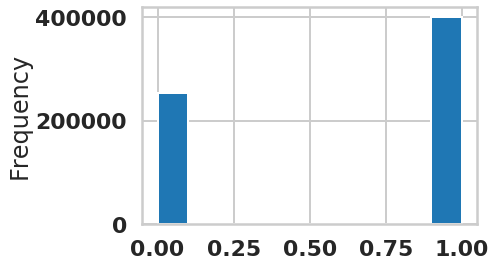

In [ ]:
# Plotting and Univariate Analysis
final['in_out_code'].plot(kind="hist")

### Bi-Variate Analysis

In [ ]:
#importing the dataset,which has been finally cleaned with few socio economic factors
data_large=pd.read_csv("C:/Users/Public/Downloads/2019 Fall capstone - leakagedata/Working Folder/Data/Code/Data/Cleaned_Data_ModDummyV1.3.csv")

In [ ]:
data_large.head()

,proc_cd,age,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month_Fall,month_Spring,month_Summer,month_Winter,Avg_Income,Population
0,0026U,91,1,1205834769,60601,1205834769,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0
1,0026U,57,1,1205834769,60601,1427025139,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0
2,0037U,61,1,1265714091,27560,1265714091,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN
3,0037U,65,1,1265714091,27560,1265714091,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,NaN,NaN
4,0037U,61,1,1265714091,27560,1265714091,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,NaN


In [ ]:
data_large=data_large.drop(data_large.columns[0],axis=1)
data_large=data_large.drop(["proc_cd"],axis=1)

In [ ]:
data_large.shape

(653710, 27)

In [ ]:
#Looking for columns with null Values in socio economic factors
[col for col in data_large.columns if data_large[col].isnull().any()]

['Avg_Income', 'Population']

In [ ]:
#Removing Rows with null values
data_large = data_large.dropna(axis = 0, how ='any')  

In [ ]:
data_large.head()

,proc_cd,age,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month_Fall,month_Spring,month_Summer,month_Winter,Avg_Income,Population
0,0026U,91,1,1205834769,60601,1205834769,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0
1,0026U,57,1,1205834769,60601,1427025139,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0
6,0042T,42,1,1336159961,60153,1295994168,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,41970.0,26863.0
7,0042T,57,1,1700285335,60068,1700285335,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,73172.0,37732.0
9,0042T,58,1,1013965326,60451,1013965326,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,70698.0,27338.0


In [ ]:
data_large.age.unique()

array([91, 57, 42, 58, 56, 59, 64, 66, 44, 55, 49, 54, 52, 60, 50, 35, 74,
       80, 61, 45, 19, 26, 63, 79, 32, 62, 51, 76, 48, 34, 67, 65, 73, 39,
       12, 14, 10,  7, 53, 37, 18, 31,  1, 71, 29, 41, 23, 43, 68, 47, 40,
       21, 36, 46, 33, 38, 16, 24, 28, 30, 25, 75, 70, 69, 17, 22, 20, 15,
        0, 11,  9,  4, 72, 82, 85,  8,  5, 77, 81, 27,  2,  3,  6, 13, 78,
       83, 86, 84, 89, 88, 87], dtype=int64)

In [ ]:
#Created an Age band for the dataset to get deeper insights on the impact of the age
data_large['age_by_decade'] = pd.cut(x=data_large['age'], bins=[1, 30, 60, 99], labels=['Below30s', 'Below60s', 'Above60s'])

In [ ]:
data_large.head()

,age,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month_Fall,month_Spring,month_Summer,month_Winter,Avg_Income,Population,age_by_decade
0,91,1,1205834769,60601,1205834769,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0,Above60s
1,57,1,1205834769,60601,1427025139,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0,Below60s
6,42,1,1336159961,60153,1295994168,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,41970.0,26863.0,Below60s
7,57,1,1700285335,60068,1700285335,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,73172.0,37732.0,Below60s
9,58,1,1013965326,60451,1013965326,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,70698.0,27338.0,Below60s


In [ ]:
# As the Age bands created are categorical values, so inorder to make optimized 
#for modeling we created dummy variable for the same
#Creating Dummmy Variables for the Modality
dummydf3=pd.get_dummies(data_large,columns=["age_by_decade"])
#we will just make a copy here in case we need to use it in the future
dummydf3=dummydf3.join(data_large[["age_by_decade"]])
print(dummydf3.shape)
dummydf3.head(2)

(619777, 30)


,age,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month_Fall,month_Spring,month_Summer,month_Winter,Avg_Income,Population,age_by_decade_Below30s,age_by_decade_Below60s,age_by_decade_Above60s,age_by_decade
0,91,1,1205834769,60601,1205834769,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0,0,0,1,Above60s
1,57,1,1205834769,60601,1427025139,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0,0,1,0,Below60s


In [ ]:
data_large1=dummydf3
data_large1.head()

,age,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month_Fall,month_Spring,month_Summer,month_Winter,Avg_Income,Population,age_by_decade_Below30s,age_by_decade_Below60s,age_by_decade_Above60s,age_by_decade
0,91,1,1205834769,60601,1205834769,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0,0,0,1,Above60s
1,57,1,1205834769,60601,1427025139,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,77374.0,5591.0,0,1,0,Below60s
6,42,1,1336159961,60153,1295994168,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,41970.0,26863.0,0,1,0,Below60s
7,57,1,1700285335,60068,1700285335,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,73172.0,37732.0,0,1,0,Below60s
9,58,1,1013965326,60451,1013965326,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,70698.0,27338.0,0,1,0,Below60s


In [ ]:
#Once the dummy variables have been created we have remove the redundant column present
data_large=dummydf3
data_large=data_large.drop(["age_by_decade"],axis=1)

In [ ]:
# Now to start with the Analysis we created the split firstly
from sklearn.model_selection import train_test_split
#Using train_test_split function to split the dataset into train and test split
itrain, itest = train_test_split(range(data_large.shape[0]), train_size=0.7) 

In [ ]:
mask=np.ones(data_large.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [ ]:
data_large=data_large.dropna()

In [ ]:
np.nan_to_num(data_large)

array([[9.10000000e+01, 1.00000000e+00, 1.20583477e+09, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.70000000e+01, 1.00000000e+00, 1.20583477e+09, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.20000000e+01, 1.00000000e+00, 1.33615996e+09, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.50000000e+01, 1.00000000e+00, 1.57874506e+09, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.20000000e+01, 0.00000000e+00, 1.80183398e+09, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.70000000e+01, 1.00000000e+00, 1.79002959e+09, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
#Data to be standardized are incorporated in the list
#We have a list of continuous features, or in other words standardizable variables
STANDARDIZABLE=["Avg_Income","Population","age","line_billed_amount", "line_allowed_amount","line_svc_prov_npi","billing_prov_npi"]

#Also create a list for indicator variable. We can do this by excluding the above continuous features from total features. 
INDICATOR=list(data_large.columns)
#We need to remove the response variable from our total list of features
INDICATOR.remove(u'in_out_code')


In [ ]:
print (len(STANDARDIZABLE), len(INDICATOR))

7 28


In [ ]:
#Final scaling of training and test dataset happens
from sklearn.preprocessing import StandardScaler
#Standardize training set
data_large.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(data_large.loc[mask,STANDARDIZABLE])
#Standardize test set
data_large.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(data_large.loc[~mask,STANDARDIZABLE])

In [ ]:
data_large.head()

,age,in_out_code,billing_prov_npi,prov_zip,line_svc_prov_npi,line_billed_amount,line_allowed_amount,Modality_Breast Biopsy-MRI,Modality_Breast Biopsy-U/S,Modality_Breast Stereo,Modality_Breast Ultrasound,Modality_CT,Modality_Dual_Modality,Modality_IR,Modality_MRI,Modality_Mammography,Modality_Molecular,Modality_Nuclear,Modality_Others,Modality_Ultrasound,month_Fall,month_Spring,month_Summer,month_Winter,Avg_Income,Population,age_by_decade_Below30s,age_by_decade_Below60s,age_by_decade_Above60s
0,2.874782,1,-1.441384,60601,-1.023097,-0.290868,-0.281400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.480044,-2.653610,0,0,1
1,0.585501,1,-1.441517,60601,-0.250937,-0.273302,-0.268398,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.480941,-2.643248,0,1,0
6,-0.428755,1,-0.968662,60153,-0.708285,-0.290868,-0.281400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-1.751214,-0.774990,0,1,0
7,0.585501,1,0.352850,60068,0.703452,-0.273302,-0.268398,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.215580,0.184837,0,1,0
9,0.649951,1,-2.137341,60451,-1.693053,-0.290868,-0.281400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.059304,-0.733041,0,1,0


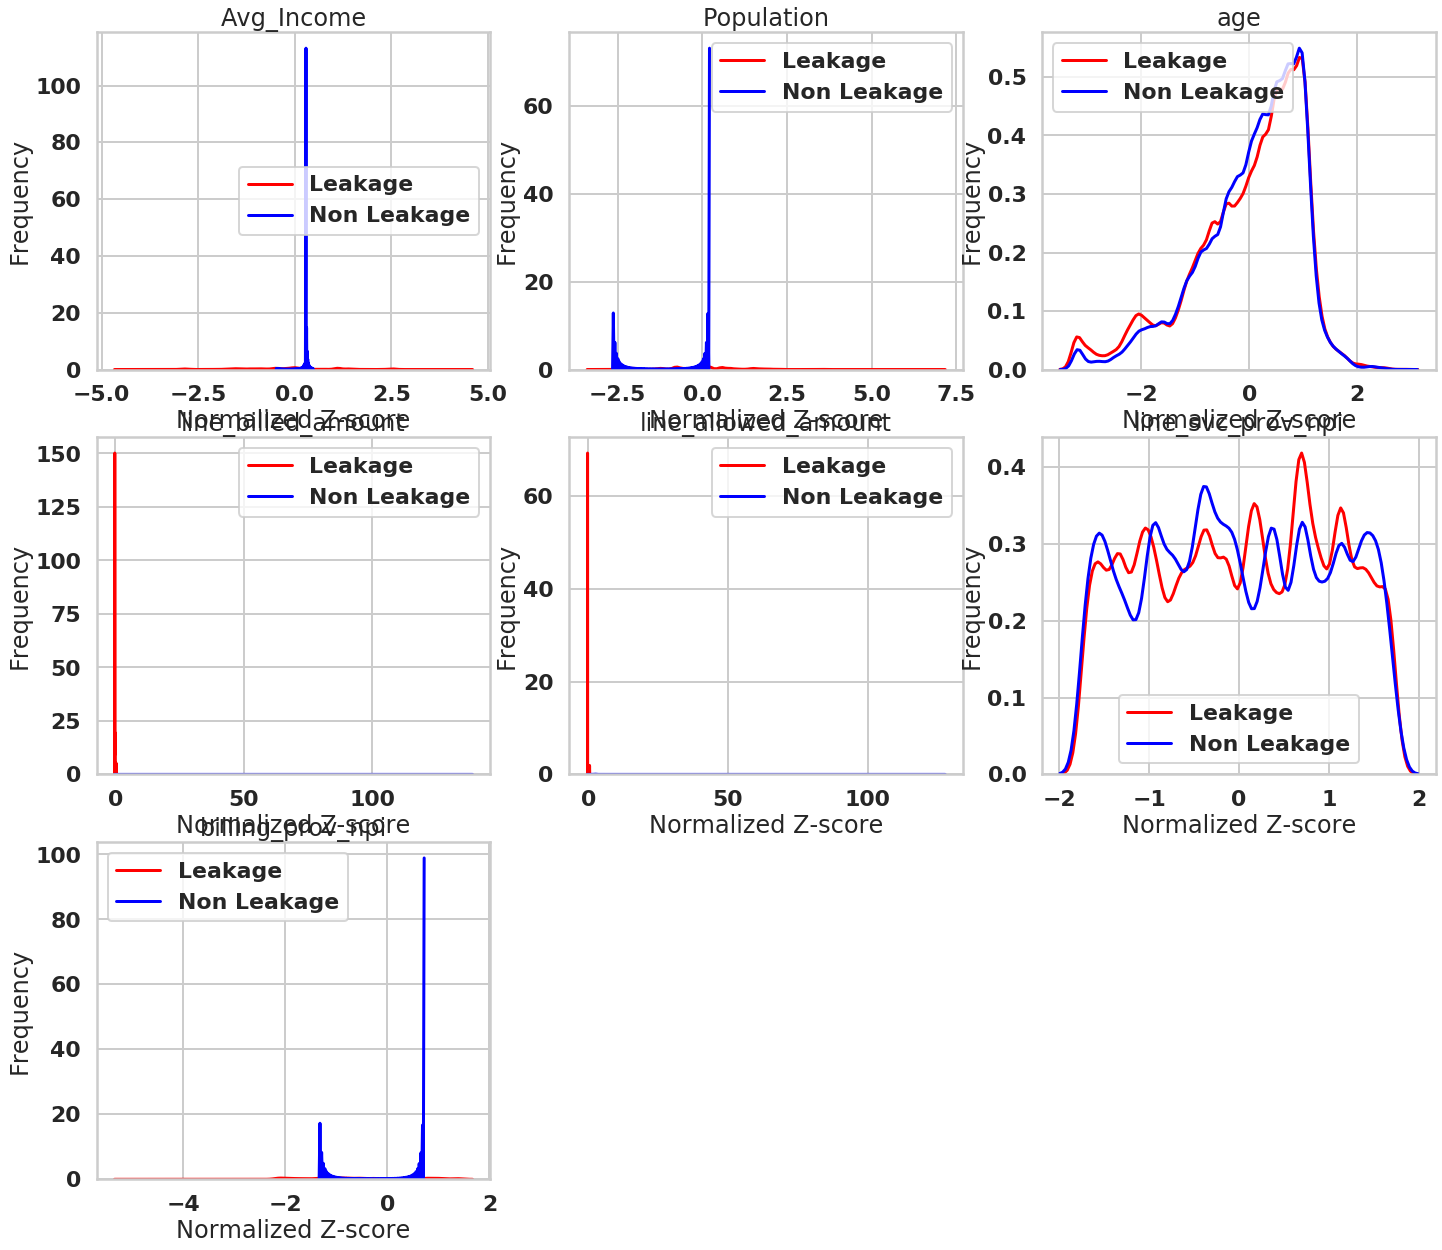

In [ ]:
fig=plt.figure(figsize=(24,36))
pos=data_large[data_large["in_out_code"]==1]
neg=data_large[data_large["in_out_code"]==0]
for k in range (7):
    ax=fig.add_subplot(5,3,k+1)    
    sns.kdeplot(pos[STANDARDIZABLE[k]],color="red",label="Leakage")
    sns.kdeplot(neg[STANDARDIZABLE[k]],color="blue",label="Non Leakage")
    ax.set_title(STANDARDIZABLE[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")

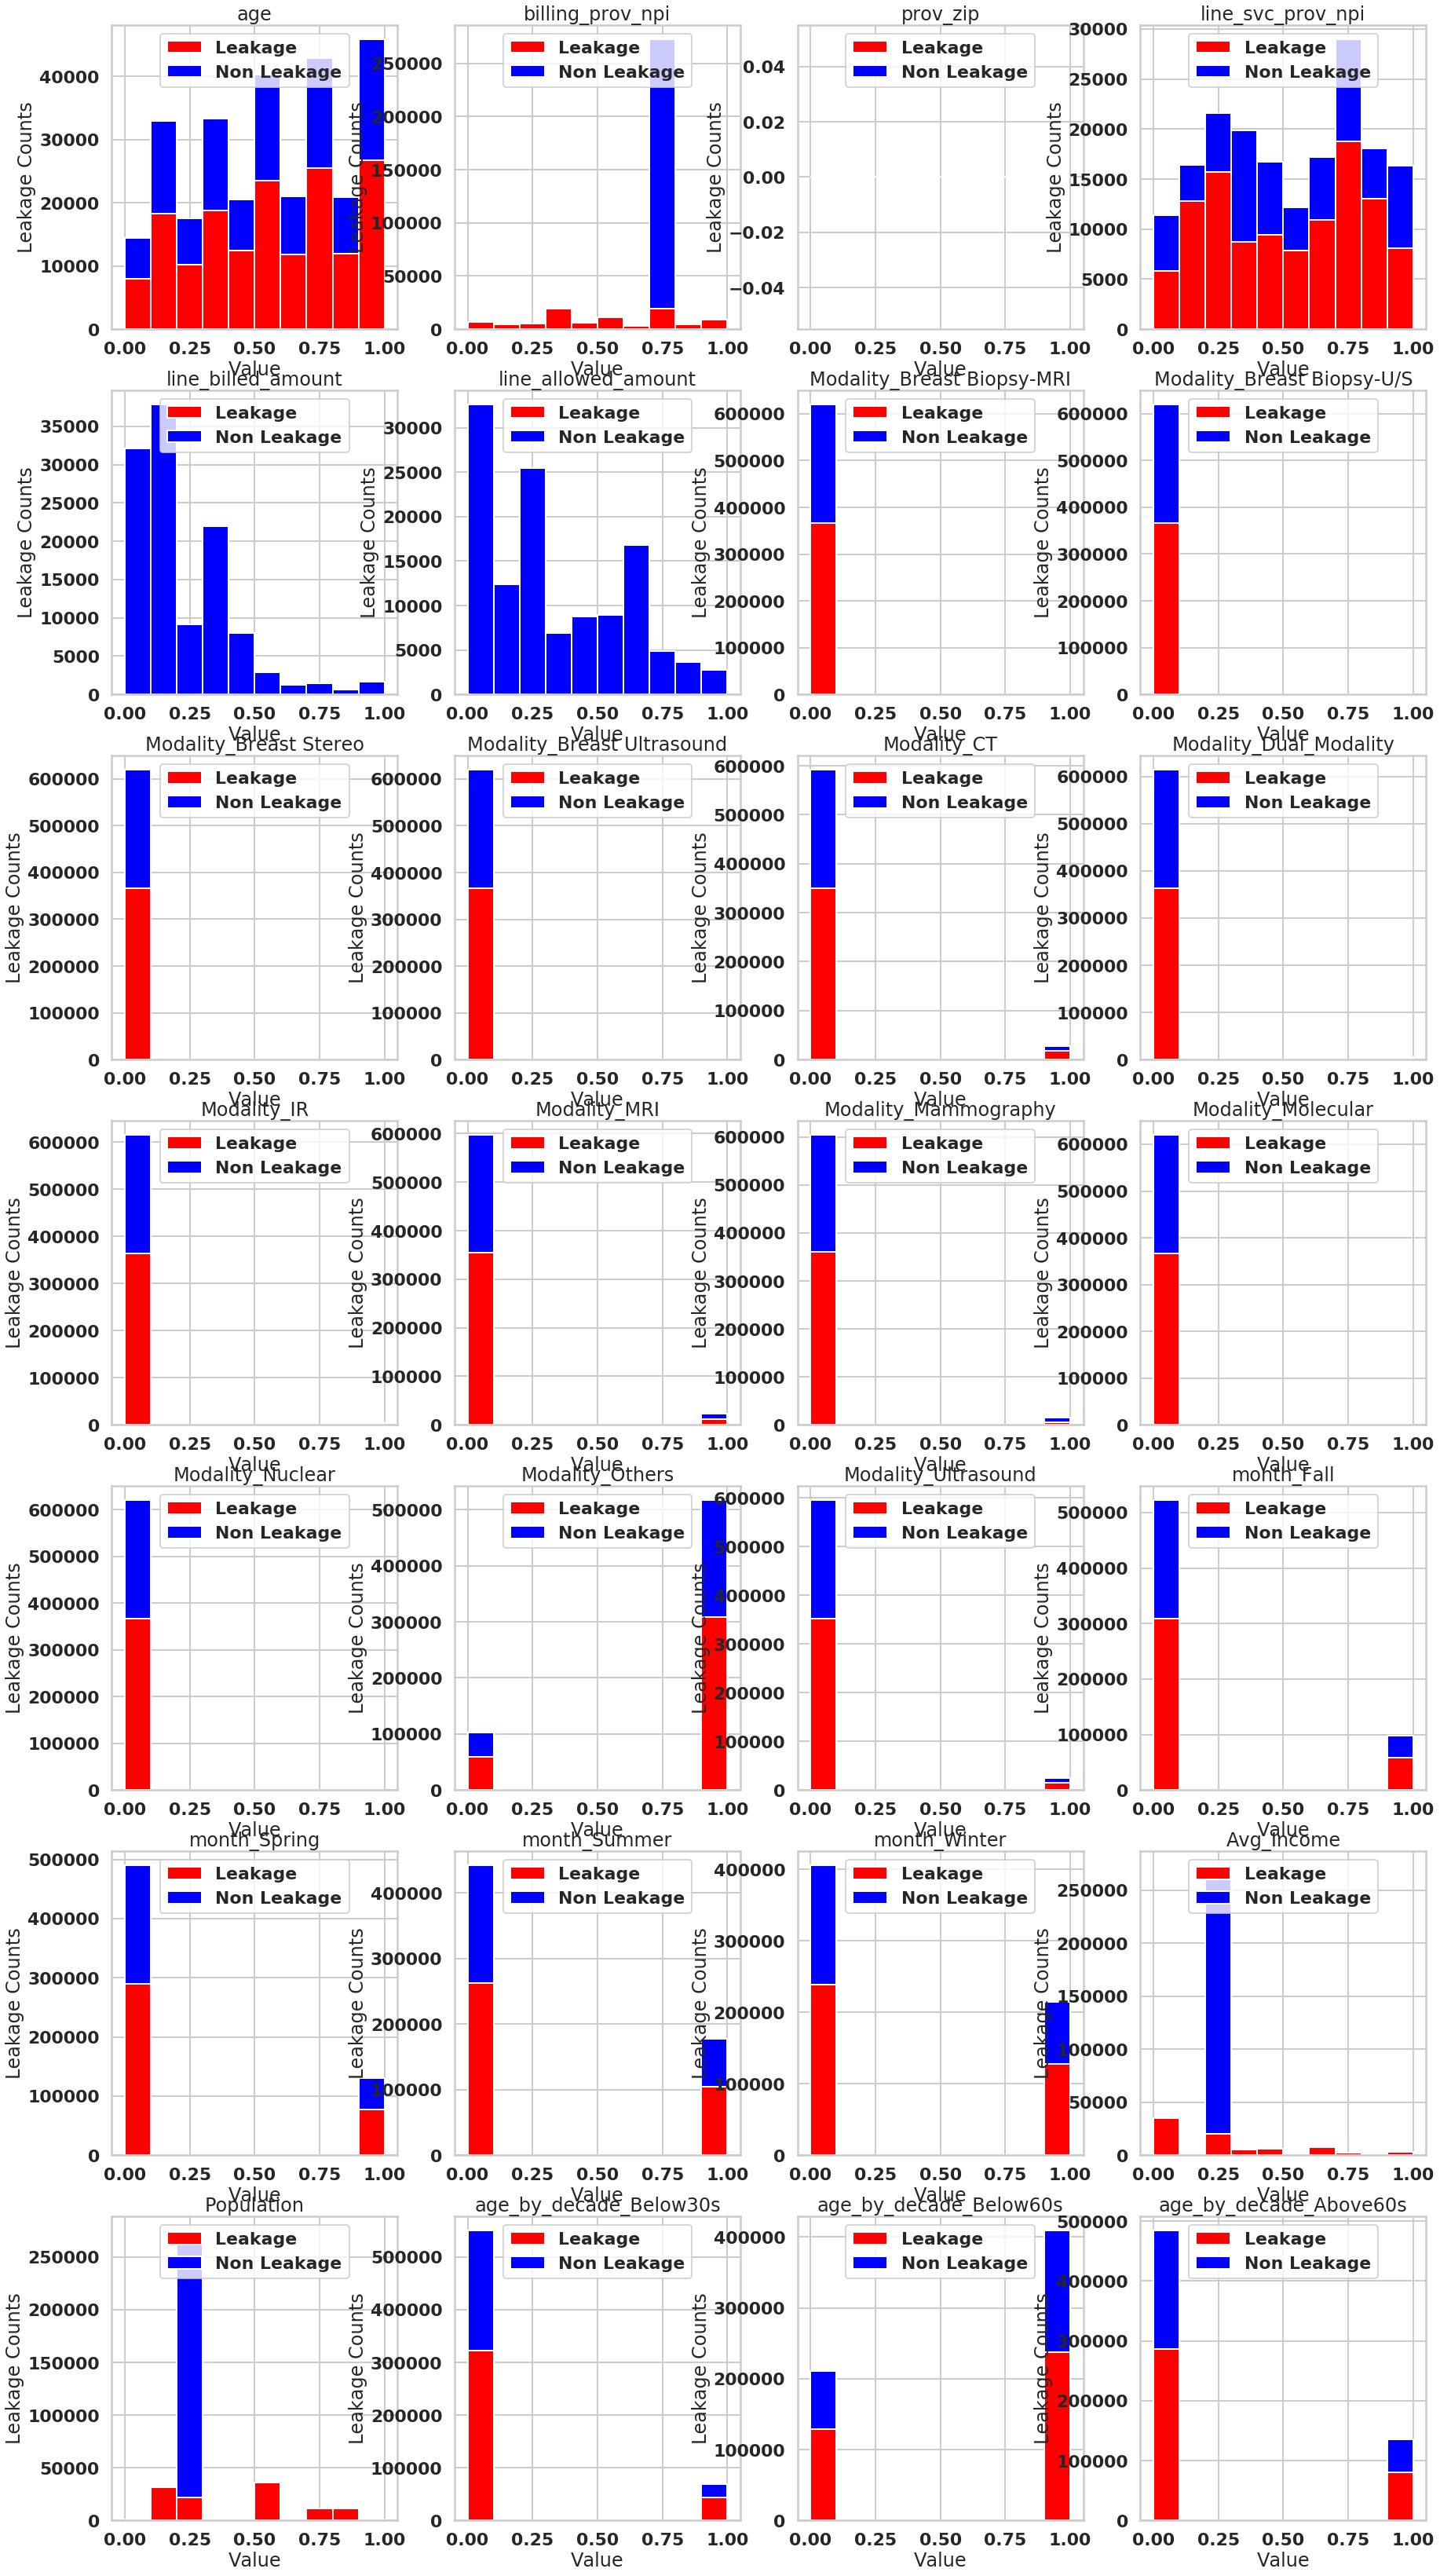

In [ ]:
#Generated bi-variated analysis plot for the variables with respect to the targeted leakage code
fig=plt.figure(figsize=(30,144))
pos=data_large[data_large['in_out_code']==1]
neg=data_large[data_large['in_out_code']==0]
for k in range (0,28):
    ax=fig.add_subplot(17,4,k+1)
    ax.hist((pos[INDICATOR[k]],neg[INDICATOR[k]]),stacked=True,color=("red","blue"),range=[0,1])
    ax.set_title(INDICATOR[k])
    ax.legend(("Leakage","Non Leakage"),loc="upper center")
    ax.set_xlabel("Value")
    ax.set_ylabel("Leakage Counts")

### Multivariate Analysis

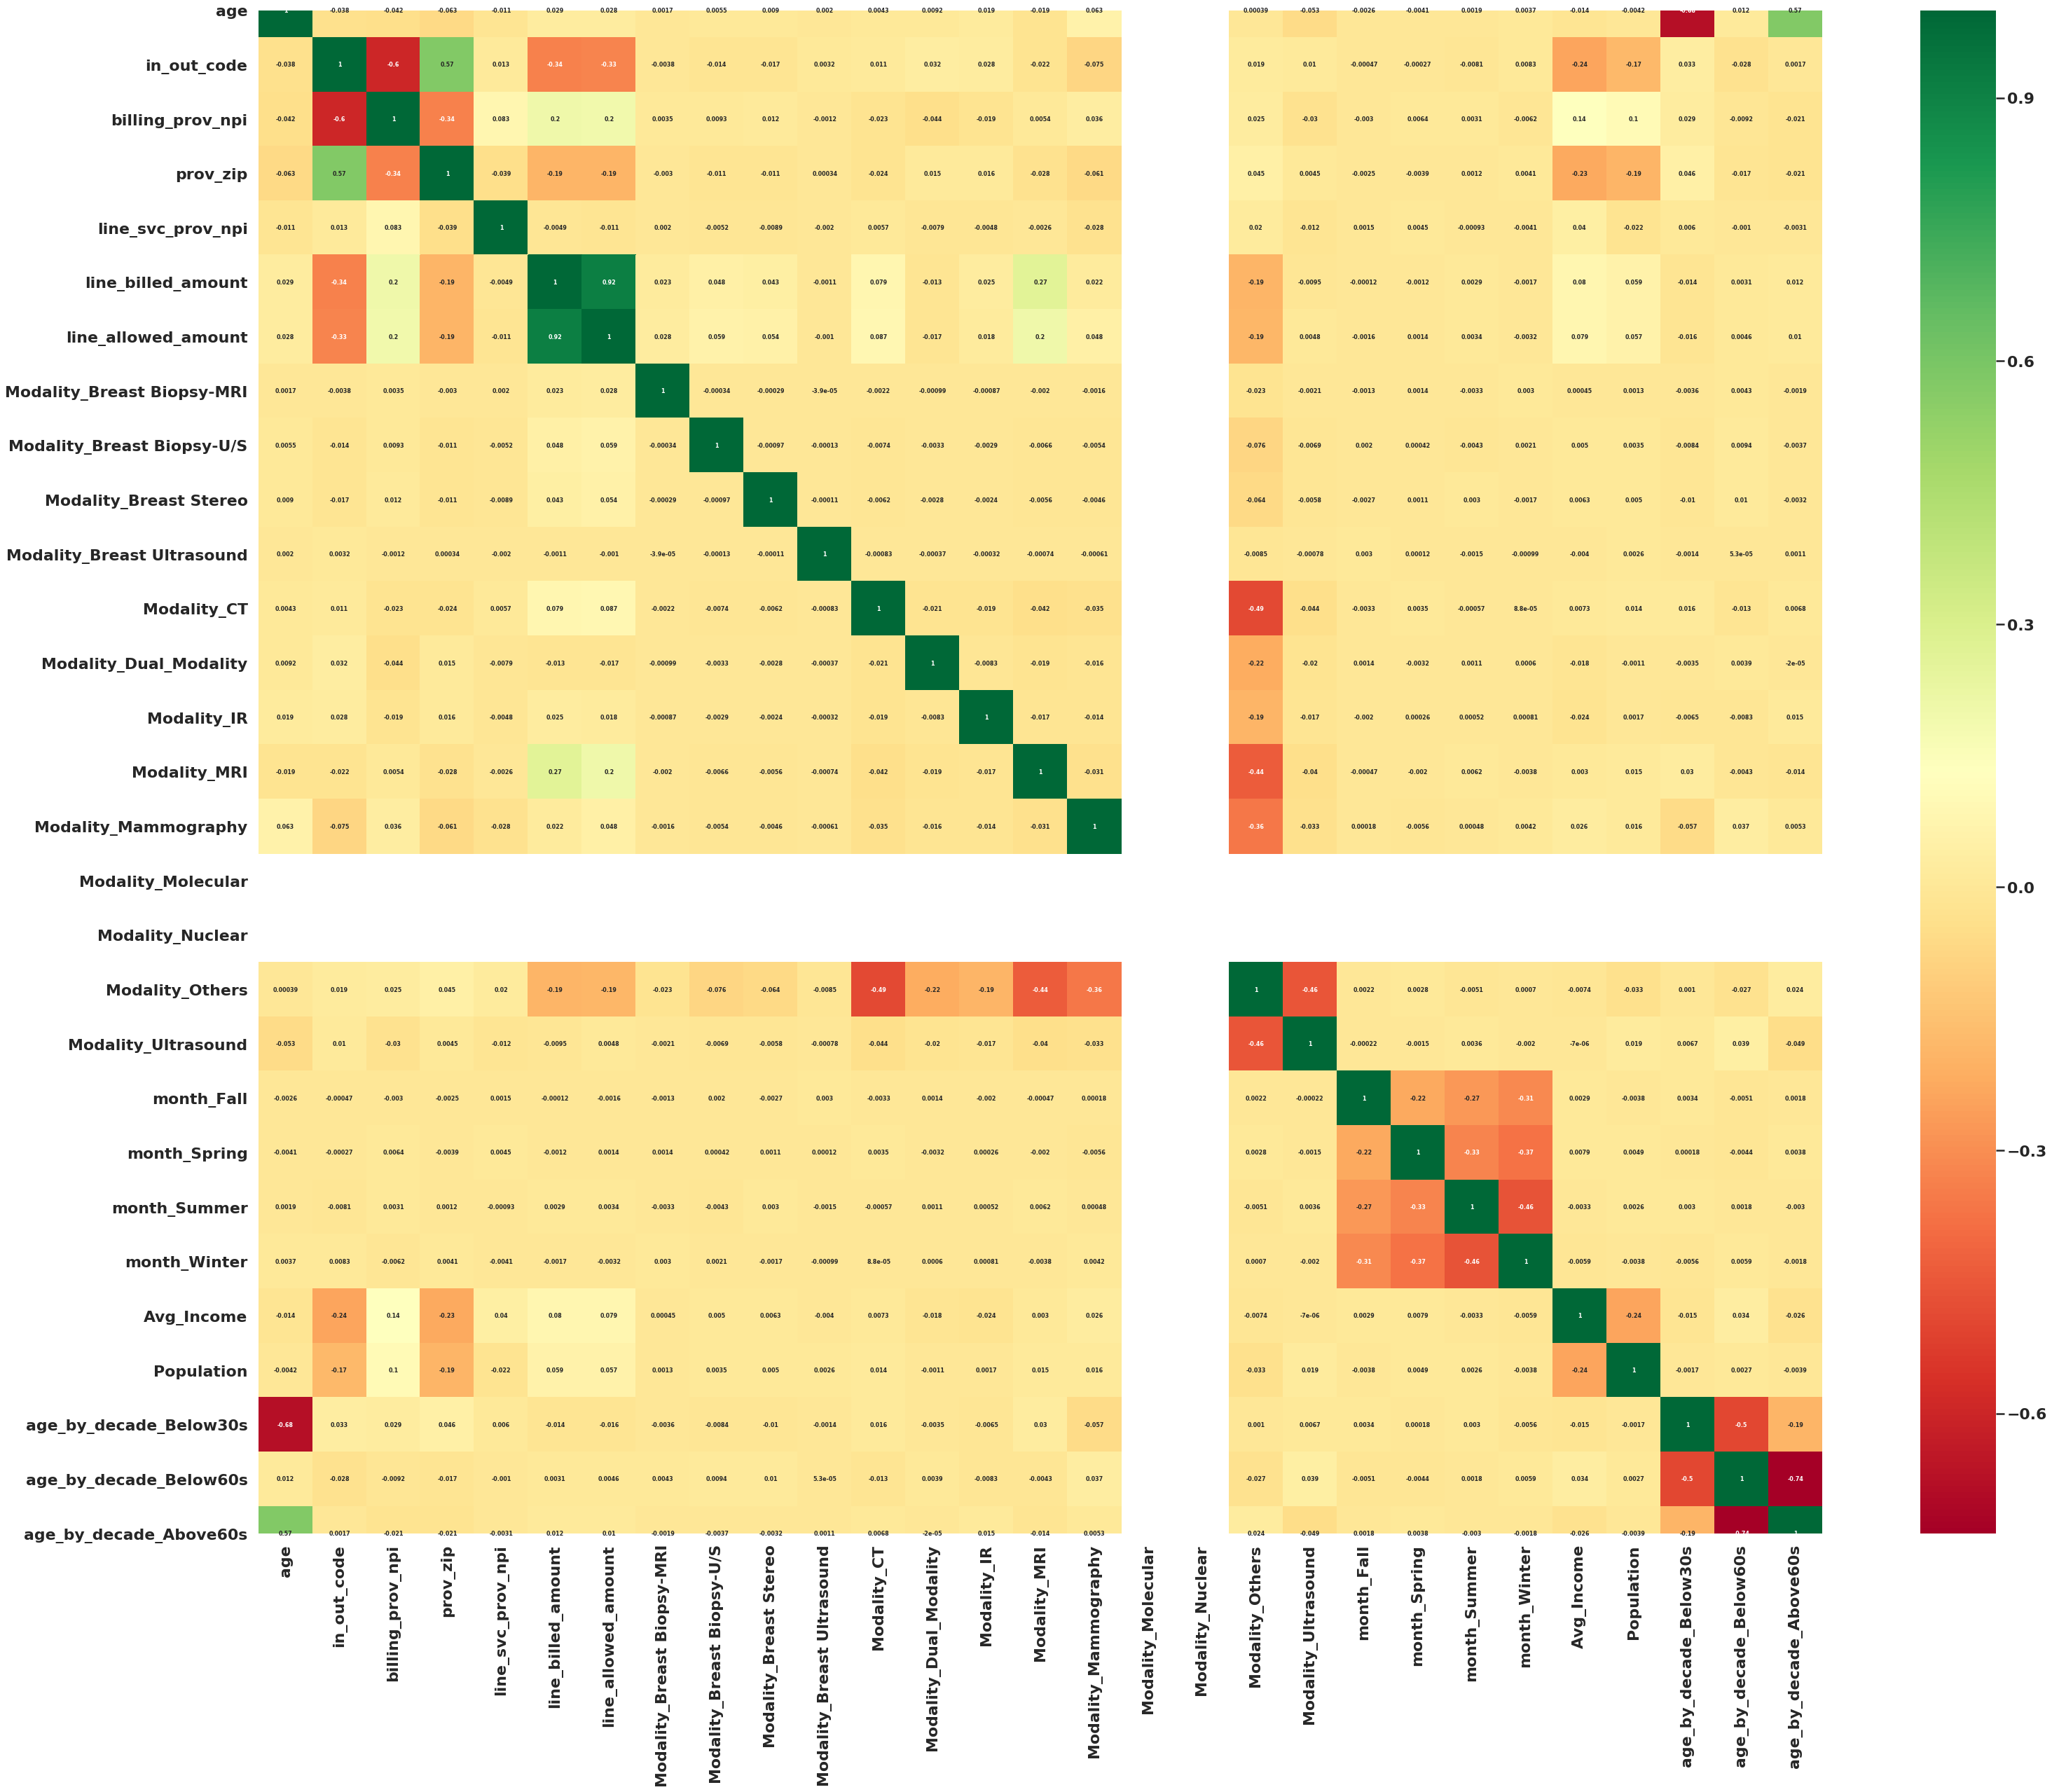

In [ ]:
#Multivariate Analysis of all Features
#Generated heat plot for all the variables to get the correlations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data_large.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,40))
#plot heat map
g=sns.heatmap(data_large[top_corr_features].corr(),annot=True,cmap="RdYlGn")

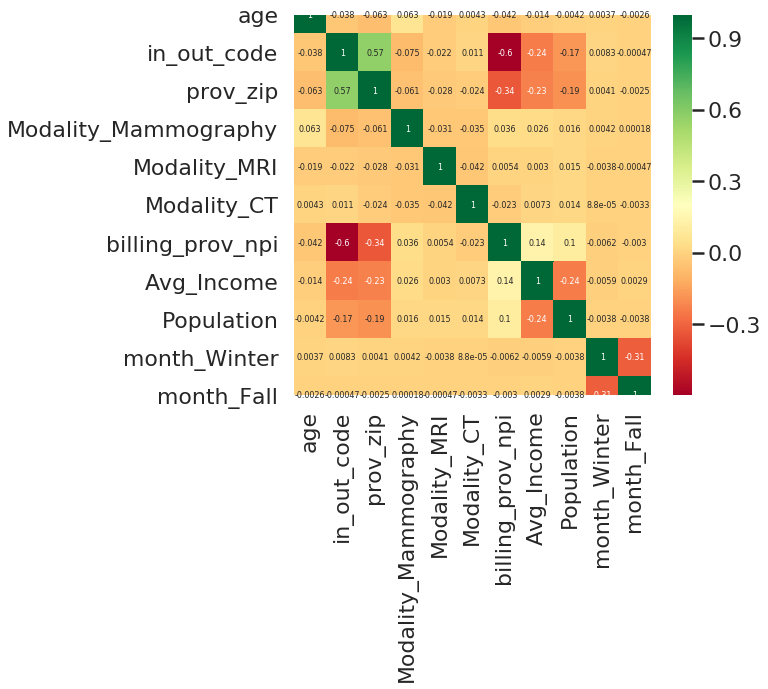

In [ ]:
#Multivariate Analysis of important Features for presentation
#Generated heat plot for all the variables to get the correlations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
data_subset=data_large[['age', 'in_out_code','prov_zip','Modality_Mammography','Modality_MRI','Modality_CT','billing_prov_npi','Avg_Income','Population','month_Winter','month_Fall',]]
corrmat = data_subset.corr()
top_corr_features = corrmat.index
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)
plt.figure(figsize=(8,7))
#plot heat map
g=sns.heatmap(data_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

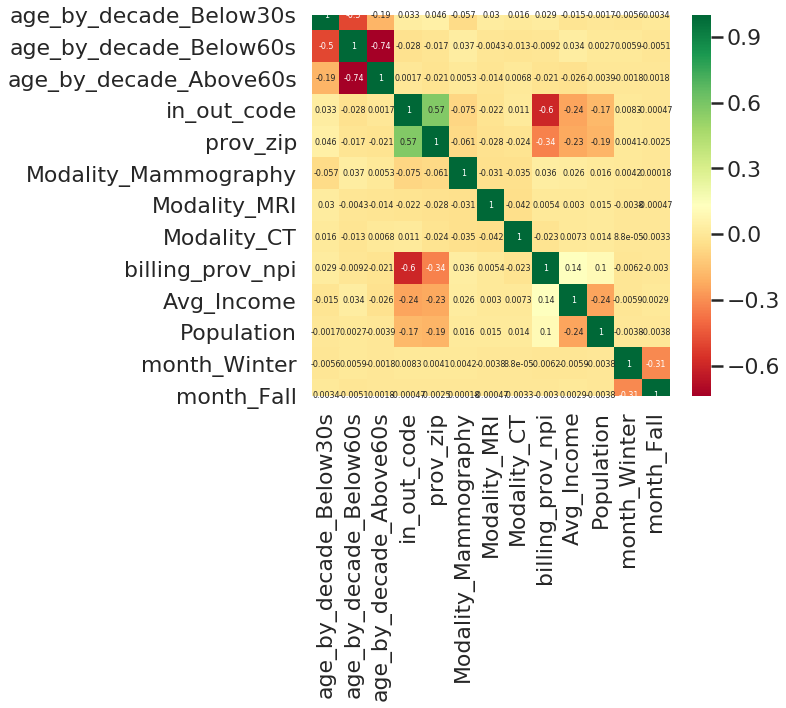

In [ ]:
#Multivariate Analysis of important Features for presentation
#Generated heat plot for all the variables to get the correlations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
data_subset=data_large[['age_by_decade_Below30s','age_by_decade_Below60s','age_by_decade_Above60s', 'in_out_code','prov_zip','Modality_Mammography','Modality_MRI','Modality_CT','billing_prov_npi','Avg_Income','Population','month_Winter','month_Fall',]]
corrmat = data_subset.corr()
top_corr_features = corrmat.index
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)
plt.figure(figsize=(8,7))
#plot heat map
g=sns.heatmap(data_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('coorplot.png',bbox_inches='tight')

### Variable importance using Random Forest

In [ ]:
#Another implementaion to look into the variable importance using RandomForest
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Selecting all the variables excluding target variables
X=data_large.loc[:, data_large.columns != 'in_out_code'] 
y = data_large[['in_out_code']]    #target column #apply SelectKBest class to extract top 10 best features

Feature ranking:
1. feature 1 (0.195727)
2. feature 2 (0.092816)
3. feature 0 (0.077242)
4. feature 10 (0.025414)
5. feature 8 (0.025293)
6. feature 7 (0.024502)
7. feature 12 (0.024410)
8. feature 3 (0.024357)
9. feature 15 (0.024315)
10. feature 25 (0.023910)
11. feature 22 (0.023864)
12. feature 13 (0.023825)
13. feature 11 (0.023708)
14. feature 21 (0.023621)
15. feature 24 (0.023592)
16. feature 29 (0.023547)
17. feature 14 (0.023540)
18. feature 5 (0.023244)
19. feature 17 (0.023176)
20. feature 16 (0.023143)
21. feature 28 (0.023138)
22. feature 9 (0.023126)
23. feature 23 (0.022898)
24. feature 26 (0.022881)
25. feature 18 (0.022772)
26. feature 4 (0.022760)
27. feature 27 (0.022595)
28. feature 6 (0.022584)
29. feature 19 (0.022105)
30. feature 20 (0.021894)


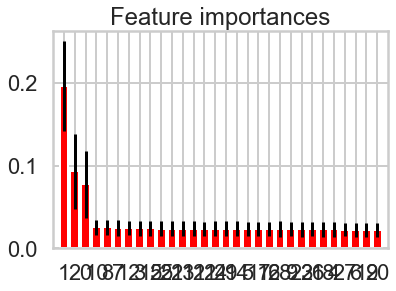

In [ ]:
#Working on Feature importance
X, y = make_classification(n_samples=1000,
                           n_features=30,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Modeling: Implemented Modeling on the dataset

## Model 0: Baseline Model

In [ ]:
#Model-0 Baseline Model
pos=data_large[data_large['in_out_code']==1]
neg=data_large[data_large['in_out_code']==0]
percent_leakage=float(len(pos))/len(data_large)
percent_non_leakage=float(len(neg))/len(data_large)
print (percent_leakage, percent_non_leakage)

0.5914950054616418 0.40850499453835815


In [ ]:
#BaseLine Model Accuracy
#Let's make a dictionary storing confusion matrix for all the algorithms, so that we can have some comparison
confusion_dict={}
confusion_dict["Baseline_model"]=np.asarray([[len(neg),0],[len(pos),0]])
#Also create a dictionary to store all the models
model_dict={}
#The following dict will store the accuracy for training set
accuracy_dict={}
#The following dict will store the accuracy for test set
accuracy_dict1={}
train_not_severe_percent=1-float(sum(data_large["in_out_code"].values[mask]))/len(data_large["in_out_code"].values[mask])
test_not_severe_percent=1-float(sum(data_large["in_out_code"].values[~mask]))/len(data_large["in_out_code"].values[~mask])
print (train_not_severe_percent, test_not_severe_percent) 
accuracy_dict["Baseline_model"]=train_not_severe_percent
accuracy_dict1["Baseline_model"]=test_not_severe_percent

0.4077788508746252 0.41019931803758325


## Model 1: Logistic Regression

In [ ]:
#Split the entire dataset
from sklearn.model_selection import train_test_split
#new_dta=data_large.drop(["age"],axis=1)
X=data_large.loc[:, data_large.columns != 'in_out_code'] 
y=data_large[['in_out_code']] 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(433843, 27)

In [ ]:
Y_train.head()

,in_out_code
342871,1
487750,0
63310,1
423778,1
396491,1


In [ ]:
#Performed Model Fit
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,Y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,Y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on the training set: 0.679
Accuracy on the test set: 0.677


## Model 2: Neural Network Model

In [ ]:

from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, Y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, Y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acc for training data: 0.592
acc for test data: 0.591


## Model 3: Optimized Neural Network Model

In [ ]:
#Scaled the train and test data and finally optimized the model within the parameter space
#Further optimized it with the use of hidden layer and activation function
#1- Scaling X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)
#mlp = MLPClassifier(max_iter=1000, alpha=2, random_state=42)
mlp=MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50,50), random_state=1,max_iter=10,verbose=10,learning_rate_init=.1)
mlp.fit(X_train_scaled,Y_train)
print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, Y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, Y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67982320
Iteration 3, loss = 0.67926247
Iteration 4, loss = 0.67848765
Iteration 5, loss = 0.67777898
Iteration 6, loss = 0.67732346
Iteration 7, loss = 0.67692690
Iteration 8, loss = 0.32244305
Iteration 9, loss = 0.10688896
Iteration 10, loss = 0.10417388


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


acc for training data: 0.979
acc for test data: 0.979


In [ ]:
#Further optimized it with the use of hidden layer and activation function
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(max_iter=100)

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54952573
Iteration 2, loss = 0.54635461
Iteration 3, loss = 0.54602464
Iteration 4, loss = 0.54560596
Iteration 5, loss = 0.54557627
Iteration 6, loss = 0.54548058
Iteration 7, loss = 0.54563184
Iteration 8, loss = 0.54544073


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54942191
Iteration 2, loss = 0.54671260
Iteration 3, loss = 0.54586796
Iteration 4, loss = 0.54581436
Iteration 5, loss = 0.54576724
Iteration 6, loss = 0.54562803
Iteration 7, loss = 0.54550219
Iteration 8, loss = 0.54554488


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54941772
Iteration 2, loss = 0.54615826
Iteration 3, loss = 0.54581109
Iteration 4, loss = 0.54562827
Iteration 5, loss = 0.54549521
Iteration 6, loss = 0.54554506
Iteration 7, loss = 0.54532324
Iteration 8, loss = 0.54532715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.88034375
Iteration 2, loss = 0.69953962
Iteration 3, loss = 0.69838421
Iteration 4, loss = 0.70112103
Iteration 5, loss = 0.69844304
Iteration 6, loss = 0.69825731
Iteration 7, loss = 0.69791811
Iteration 8, loss = 0.69712661


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.72074156
Iteration 2, loss = 0.67501928
Iteration 3, loss = 0.69865627
Iteration 4, loss = 0.69933219
Iteration 5, loss = 0.69674183
Iteration 6, loss = 0.69945754
Iteration 7, loss = 0.69583275
Iteration 8, loss = 0.69851217


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.75231527
Iteration 2, loss = 0.70240110
Iteration 3, loss = 0.69692155
Iteration 4, loss = 0.69743331
Iteration 5, loss = 0.70157738
Iteration 6, loss = 0.69394942
Iteration 7, loss = 0.69995605
Iteration 8, loss = 0.69704503


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54952573
Iteration 2, loss = 0.54635461
Iteration 3, loss = 0.54602464
Iteration 4, loss = 0.54560596
Iteration 5, loss = 0.54557627
Iteration 6, loss = 0.54548058
Iteration 7, loss = 0.54563184
Iteration 8, loss = 0.54544073


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54942191
Iteration 2, loss = 0.54671260
Iteration 3, loss = 0.54586796
Iteration 4, loss = 0.54581436
Iteration 5, loss = 0.54576724
Iteration 6, loss = 0.54562803
Iteration 7, loss = 0.54550219
Iteration 8, loss = 0.54554488


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54941772
Iteration 2, loss = 0.54615826
Iteration 3, loss = 0.54581109
Iteration 4, loss = 0.54562827
Iteration 5, loss = 0.54549521
Iteration 6, loss = 0.54554506
Iteration 7, loss = 0.54532324
Iteration 8, loss = 0.54532715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.88034375
Iteration 2, loss = 0.69953962
Iteration 3, loss = 0.69838421
Iteration 4, loss = 0.70112103
Iteration 5, loss = 0.69844304
Iteration 6, loss = 0.69825731
Iteration 7, loss = 0.69791811
Iteration 8, loss = 0.69712661


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.72074156
Iteration 2, loss = 0.67501928
Iteration 3, loss = 0.69865627
Iteration 4, loss = 0.69933219
Iteration 5, loss = 0.69674183
Iteration 6, loss = 0.69945754
Iteration 7, loss = 0.69583275
Iteration 8, loss = 0.69851217


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.75231527
Iteration 2, loss = 0.70240110
Iteration 3, loss = 0.69692155
Iteration 4, loss = 0.69743331
Iteration 5, loss = 0.70157738
Iteration 6, loss = 0.69394942
Iteration 7, loss = 0.69995605
Iteration 8, loss = 0.69704503


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.55041373
Iteration 2, loss = 0.54625980
Iteration 3, loss = 0.54593313
Iteration 4, loss = 0.54594313
Iteration 5, loss = 0.54563025
Iteration 6, loss = 0.54544364
Iteration 7, loss = 0.54544829
Iteration 8, loss = 0.54535959


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54964705
Iteration 2, loss = 0.54673689
Iteration 3, loss = 0.54619627
Iteration 4, loss = 0.54582786
Iteration 5, loss = 0.54548689
Iteration 6, loss = 0.54540275
Iteration 7, loss = 0.54561414
Iteration 8, loss = 0.54554659


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.55063962
Iteration 2, loss = 0.54638960
Iteration 3, loss = 0.54598339
Iteration 4, loss = 0.54576327
Iteration 5, loss = 0.54540904
Iteration 6, loss = 0.54555932
Iteration 7, loss = 0.54552862
Iteration 8, loss = 0.54546290


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.78680245
Iteration 2, loss = 0.70408432
Iteration 3, loss = 0.70489420
Iteration 4, loss = 0.70149964
Iteration 5, loss = 0.70175323
Iteration 6, loss = 0.69888497
Iteration 7, loss = 0.69903090
Iteration 8, loss = 0.69597943


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.74573460
Iteration 2, loss = 0.70751811
Iteration 3, loss = 0.69860673
Iteration 4, loss = 0.70087068
Iteration 5, loss = 0.69999993
Iteration 6, loss = 0.69954960
Iteration 7, loss = 0.69575998
Iteration 8, loss = 0.69814416


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.79451323
Iteration 2, loss = 0.70350732
Iteration 3, loss = 0.70058499
Iteration 4, loss = 0.69944766
Iteration 5, loss = 0.69970068
Iteration 6, loss = 0.70040959
Iteration 7, loss = 0.69922371
Iteration 8, loss = 0.69735048


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.55041373
Iteration 2, loss = 0.54625980
Iteration 3, loss = 0.54593313
Iteration 4, loss = 0.54594313
Iteration 5, loss = 0.54563025
Iteration 6, loss = 0.54544364
Iteration 7, loss = 0.54544829
Iteration 8, loss = 0.54535959


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54964705
Iteration 2, loss = 0.54673689
Iteration 3, loss = 0.54619627
Iteration 4, loss = 0.54582786
Iteration 5, loss = 0.54548689
Iteration 6, loss = 0.54540275
Iteration 7, loss = 0.54561414
Iteration 8, loss = 0.54554659


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.55063962
Iteration 2, loss = 0.54638960
Iteration 3, loss = 0.54598339
Iteration 4, loss = 0.54576327
Iteration 5, loss = 0.54540904
Iteration 6, loss = 0.54555932
Iteration 7, loss = 0.54552862
Iteration 8, loss = 0.54546290


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.78680245
Iteration 2, loss = 0.70408432
Iteration 3, loss = 0.70489420
Iteration 4, loss = 0.70149964
Iteration 5, loss = 0.70175323
Iteration 6, loss = 0.69888497
Iteration 7, loss = 0.69903090
Iteration 8, loss = 0.69597943


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.74573460
Iteration 2, loss = 0.70751811
Iteration 3, loss = 0.69860673
Iteration 4, loss = 0.70087068
Iteration 5, loss = 0.69999993
Iteration 6, loss = 0.69954960
Iteration 7, loss = 0.69575998
Iteration 8, loss = 0.69814416


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.79451323
Iteration 2, loss = 0.70350732
Iteration 3, loss = 0.70058499
Iteration 4, loss = 0.69944766
Iteration 5, loss = 0.69970068
Iteration 6, loss = 0.70040959
Iteration 7, loss = 0.69922371
Iteration 8, loss = 0.69735048


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.78401831
Iteration 2, loss = 0.76014232
Iteration 3, loss = 0.76165764
Iteration 4, loss = 0.76595105
Iteration 5, loss = 0.76989389
Iteration 6, loss = 0.76950563
Iteration 7, loss = 0.76281108
Iteration 8, loss = 0.76605567


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.77047181
Iteration 2, loss = 0.76576768
Iteration 3, loss = 0.76464085
Iteration 4, loss = 0.76017889
Iteration 5, loss = 0.75817820
Iteration 6, loss = 0.76836122
Iteration 7, loss = 0.76881287
Iteration 8, loss = 0.76881547


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.77916531
Iteration 2, loss = 0.76717559
Iteration 3, loss = 0.75869319
Iteration 4, loss = 0.77493398
Iteration 5, loss = 0.76748020
Iteration 6, loss = 0.77107206
Iteration 7, loss = 0.76685536
Iteration 8, loss = 0.75849915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.71212429
Iteration 3, loss = 0.71595340
Iteration 4, loss = 0.71813336
Iteration 5, loss = 0.72538844
Iteration 6, loss = 0.72437627
Iteration 7, loss = 0.72805063
Iteration 8, loss = 0.71287228


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.70970757
Iteration 3, loss = 0.71957897
Iteration 4, loss = 0.71585041
Iteration 5, loss = 0.71372677
Iteration 6, loss = 0.72489910
Iteration 7, loss = 0.71664097
Iteration 8, loss = 0.71772172


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.71602196
Iteration 3, loss = 0.72104421
Iteration 4, loss = 0.71315716
Iteration 5, loss = 0.72078574
Iteration 6, loss = 0.71494892
Iteration 7, loss = 0.72108325
Iteration 8, loss = 0.72436626


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.78401831
Iteration 2, loss = 0.76014232
Iteration 3, loss = 0.76165764
Iteration 4, loss = 0.76595105
Iteration 5, loss = 0.76989389
Iteration 6, loss = 0.76950563
Iteration 7, loss = 0.76281108
Iteration 8, loss = 0.76605567


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.77047181
Iteration 2, loss = 0.76576768
Iteration 3, loss = 0.76464085
Iteration 4, loss = 0.76017889
Iteration 5, loss = 0.75817820
Iteration 6, loss = 0.76836122
Iteration 7, loss = 0.76881287
Iteration 8, loss = 0.76881547


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.77916531
Iteration 2, loss = 0.76717559
Iteration 3, loss = 0.75869319
Iteration 4, loss = 0.77493398
Iteration 5, loss = 0.76748020
Iteration 6, loss = 0.77107206
Iteration 7, loss = 0.76685536
Iteration 8, loss = 0.75849915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.71212429
Iteration 3, loss = 0.71595340
Iteration 4, loss = 0.71813336
Iteration 5, loss = 0.72538844
Iteration 6, loss = 0.72437627
Iteration 7, loss = 0.72805063
Iteration 8, loss = 0.71287228


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.70970757
Iteration 3, loss = 0.71957897
Iteration 4, loss = 0.71585041
Iteration 5, loss = 0.71372677
Iteration 6, loss = 0.72489910
Iteration 7, loss = 0.71664097
Iteration 8, loss = 0.71772172


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.71602196
Iteration 3, loss = 0.72104421
Iteration 4, loss = 0.71315716
Iteration 5, loss = 0.72078574
Iteration 6, loss = 0.71494892
Iteration 7, loss = 0.72108325
Iteration 8, loss = 0.72436626


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56288408
Iteration 2, loss = 0.55428325
Iteration 3, loss = 0.55122790
Iteration 4, loss = 0.54937073
Iteration 5, loss = 0.54861675
Iteration 6, loss = 0.54820537
Iteration 7, loss = 0.54818971
Iteration 8, loss = 0.54791389


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56274216
Iteration 2, loss = 0.55475014
Iteration 3, loss = 0.55113960
Iteration 4, loss = 0.54964525
Iteration 5, loss = 0.54876084
Iteration 6, loss = 0.54821526
Iteration 7, loss = 0.54801236
Iteration 8, loss = 0.54799755


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56274240
Iteration 2, loss = 0.55411157
Iteration 3, loss = 0.55110138
Iteration 4, loss = 0.54941782
Iteration 5, loss = 0.54847703
Iteration 6, loss = 0.54823020
Iteration 7, loss = 0.54788988
Iteration 8, loss = 0.54775143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.86371636
Iteration 2, loss = 0.72994672
Iteration 3, loss = 0.73628513
Iteration 4, loss = 0.73982378
Iteration 5, loss = 0.73877941
Iteration 6, loss = 0.75206899
Iteration 7, loss = 0.73867068
Iteration 8, loss = 0.72861655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.85205120
Iteration 2, loss = 0.73054262
Iteration 3, loss = 0.72960046
Iteration 4, loss = 0.72980848
Iteration 5, loss = 0.72521253
Iteration 6, loss = 0.73080337
Iteration 7, loss = 0.73048506
Iteration 8, loss = 0.73334575


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.99718016
Iteration 2, loss = 0.73280982
Iteration 3, loss = 0.72567662
Iteration 4, loss = 0.73062669
Iteration 5, loss = 0.73805490
Iteration 6, loss = 0.73162742
Iteration 7, loss = 0.73865820
Iteration 8, loss = 0.72842180


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56288408
Iteration 2, loss = 0.55428325
Iteration 3, loss = 0.55122790
Iteration 4, loss = 0.54937073
Iteration 5, loss = 0.54861675
Iteration 6, loss = 0.54820537
Iteration 7, loss = 0.54818971
Iteration 8, loss = 0.54791389


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56274216
Iteration 2, loss = 0.55475014
Iteration 3, loss = 0.55113960
Iteration 4, loss = 0.54964525
Iteration 5, loss = 0.54876084
Iteration 6, loss = 0.54821526
Iteration 7, loss = 0.54801236
Iteration 8, loss = 0.54799755


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56274240
Iteration 2, loss = 0.55411157
Iteration 3, loss = 0.55110138
Iteration 4, loss = 0.54941782
Iteration 5, loss = 0.54847703
Iteration 6, loss = 0.54823020
Iteration 7, loss = 0.54788988
Iteration 8, loss = 0.54775143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.86371636
Iteration 2, loss = 0.72994672
Iteration 3, loss = 0.73628513
Iteration 4, loss = 0.73982378
Iteration 5, loss = 0.73877941
Iteration 6, loss = 0.75206899
Iteration 7, loss = 0.73867068
Iteration 8, loss = 0.72861655


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.85205120
Iteration 2, loss = 0.73054262
Iteration 3, loss = 0.72960046
Iteration 4, loss = 0.72980848
Iteration 5, loss = 0.72521253
Iteration 6, loss = 0.73080337
Iteration 7, loss = 0.73048506
Iteration 8, loss = 0.73334575


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.99718016
Iteration 2, loss = 0.73280982
Iteration 3, loss = 0.72567662
Iteration 4, loss = 0.73062669
Iteration 5, loss = 0.73805490
Iteration 6, loss = 0.73162742
Iteration 7, loss = 0.73865820
Iteration 8, loss = 0.72842180


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56673509
Iteration 2, loss = 0.55542650
Iteration 3, loss = 0.55158769
Iteration 4, loss = 0.54997764
Iteration 5, loss = 0.54898213
Iteration 6, loss = 0.54828801
Iteration 7, loss = 0.54802288
Iteration 8, loss = 0.54780228


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56585369
Iteration 2, loss = 0.55601409
Iteration 3, loss = 0.55207463
Iteration 4, loss = 0.54988189
Iteration 5, loss = 0.54875856
Iteration 6, loss = 0.54817047
Iteration 7, loss = 0.54805865
Iteration 8, loss = 0.54792317


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56712815
Iteration 2, loss = 0.55558201
Iteration 3, loss = 0.55153868
Iteration 4, loss = 0.54953152
Iteration 5, loss = 0.54839840
Iteration 6, loss = 0.54814260
Iteration 7, loss = 0.54787592
Iteration 8, loss = 0.54773115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.85703741
Iteration 2, loss = 0.72412387
Iteration 3, loss = 0.74321044
Iteration 4, loss = 0.74270927
Iteration 5, loss = 0.74219685
Iteration 6, loss = 0.73760153
Iteration 7, loss = 0.74904187
Iteration 8, loss = 0.72132119


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.10610088
Iteration 2, loss = 0.72956412
Iteration 3, loss = 0.86667357
Iteration 4, loss = 0.75551454
Iteration 5, loss = 0.73327364
Iteration 6, loss = 0.73916822
Iteration 7, loss = 0.73975258
Iteration 8, loss = 0.73549055


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.90147211
Iteration 2, loss = 0.72518800
Iteration 3, loss = 0.73988657
Iteration 4, loss = 0.74246309
Iteration 5, loss = 0.73987312
Iteration 6, loss = 0.78173492
Iteration 7, loss = 0.73576881
Iteration 8, loss = 0.72706323


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56673509
Iteration 2, loss = 0.55542650
Iteration 3, loss = 0.55158769
Iteration 4, loss = 0.54997764
Iteration 5, loss = 0.54898213
Iteration 6, loss = 0.54828801
Iteration 7, loss = 0.54802288
Iteration 8, loss = 0.54780228


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56585369
Iteration 2, loss = 0.55601409
Iteration 3, loss = 0.55207463
Iteration 4, loss = 0.54988189
Iteration 5, loss = 0.54875856
Iteration 6, loss = 0.54817047
Iteration 7, loss = 0.54805865
Iteration 8, loss = 0.54792317


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.56712815
Iteration 2, loss = 0.55558201
Iteration 3, loss = 0.55153868
Iteration 4, loss = 0.54953152
Iteration 5, loss = 0.54839840
Iteration 6, loss = 0.54814260
Iteration 7, loss = 0.54787592
Iteration 8, loss = 0.54773115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.85703741
Iteration 2, loss = 0.72412387
Iteration 3, loss = 0.74321044
Iteration 4, loss = 0.74270927
Iteration 5, loss = 0.74219685
Iteration 6, loss = 0.73760153
Iteration 7, loss = 0.74904187
Iteration 8, loss = 0.72132119


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.10610088
Iteration 2, loss = 0.72956412
Iteration 3, loss = 0.86667357
Iteration 4, loss = 0.75551454
Iteration 5, loss = 0.73327364
Iteration 6, loss = 0.73916822
Iteration 7, loss = 0.73975258
Iteration 8, loss = 0.73549055


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.90147211
Iteration 2, loss = 0.72518800
Iteration 3, loss = 0.73988657
Iteration 4, loss = 0.74246309
Iteration 5, loss = 0.73987312
Iteration 6, loss = 0.78173492
Iteration 7, loss = 0.73576881
Iteration 8, loss = 0.72706323


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.79054658
Iteration 2, loss = 0.76796716
Iteration 3, loss = 0.77208866
Iteration 4, loss = 0.77438567
Iteration 5, loss = 0.77708704
Iteration 6, loss = 0.77737045
Iteration 7, loss = 0.77371939
Iteration 8, loss = 2.08026100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.77682782
Iteration 2, loss = 0.77387055
Iteration 3, loss = 0.76796374
Iteration 4, loss = 0.76841489
Iteration 5, loss = 0.76230651
Iteration 6, loss = 0.77338373
Iteration 7, loss = 0.77484963
Iteration 8, loss = 0.74124880


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.78590774
Iteration 2, loss = 0.77355454
Iteration 3, loss = 0.76243064
Iteration 4, loss = 0.78126380
Iteration 5, loss = 0.77404870
Iteration 6, loss = 0.78286083
Iteration 7, loss = 0.77397035
Iteration 8, loss = 0.76447209


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.58892042
Iteration 2, loss = 0.81377589
Iteration 3, loss = 0.80460475
Iteration 4, loss = 0.81249775
Iteration 5, loss = 0.82839519
Iteration 6, loss = 0.82453514
Iteration 7, loss = 0.76948249
Iteration 8, loss = 0.73821332


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.23443149
Iteration 2, loss = 0.79650192
Iteration 3, loss = 0.81410068
Iteration 4, loss = 0.82305124
Iteration 5, loss = 0.82591228
Iteration 6, loss = 0.83115314
Iteration 7, loss = 0.82783343
Iteration 8, loss = 0.83413838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.59835337
Iteration 2, loss = 0.79382210
Iteration 3, loss = 0.82556252
Iteration 4, loss = 0.82674091
Iteration 5, loss = 0.83190456
Iteration 6, loss = 0.83816709
Iteration 7, loss = 0.83747543
Iteration 8, loss = 0.83585698


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.79054658
Iteration 2, loss = 0.76796716
Iteration 3, loss = 0.77208866
Iteration 4, loss = 0.77438567
Iteration 5, loss = 0.77708704
Iteration 6, loss = 0.77737045
Iteration 7, loss = 0.77371939
Iteration 8, loss = 2.08026100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.77682782
Iteration 2, loss = 0.77387055
Iteration 3, loss = 0.76796374
Iteration 4, loss = 0.76841489
Iteration 5, loss = 0.76230651
Iteration 6, loss = 0.77338373
Iteration 7, loss = 0.77484963
Iteration 8, loss = 0.74124880


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.78590774
Iteration 2, loss = 0.77355454
Iteration 3, loss = 0.76243064
Iteration 4, loss = 0.78126380
Iteration 5, loss = 0.77404870
Iteration 6, loss = 0.78286083
Iteration 7, loss = 0.77397035
Iteration 8, loss = 0.76447209


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.58892042
Iteration 2, loss = 0.81377589
Iteration 3, loss = 0.80460475
Iteration 4, loss = 0.81249775
Iteration 5, loss = 0.82839519
Iteration 6, loss = 0.82453514
Iteration 7, loss = 0.76948249
Iteration 8, loss = 0.73821332


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.23443149
Iteration 2, loss = 0.79650192
Iteration 3, loss = 0.81410068
Iteration 4, loss = 0.82305124
Iteration 5, loss = 0.82591228
Iteration 6, loss = 0.83115314
Iteration 7, loss = 0.82783343
Iteration 8, loss = 0.83413838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.59835337
Iteration 2, loss = 0.79382210
Iteration 3, loss = 0.82556252
Iteration 4, loss = 0.82674091
Iteration 5, loss = 0.83190456
Iteration 6, loss = 0.83816709
Iteration 7, loss = 0.83747543
Iteration 8, loss = 0.83585698


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 11168453995198127089556391062096617621314349000703854930957563336326741871850926640871827939456471516962010158990739031358927990230386199135387494351845406688886852007927766177481277206188924842185663684774969923095306849193131134234394624.00000000
Iteration 3, loss = 11152236352043403794165687461425431070855181270324162601934264265085996015928325037358628044217334758900981023386206131310684173371314658320254113820533307673052034036350103432366689080634791028606792362989176107971813945768650275752509440.00000000
Iteration 4, loss = 11136042258428253739109649498405744854157455529222579168523652844515398084942582661429105767797567699268211915798111393696157155943701301492733280010710239666546513812012077969588243964022429880172117182343267041861626923168225118830723072.00000000
Iteration 5, loss = 11119871680156533753608783842300970850870169520917212436295913139882251827569211610385008247720948299792887070026022194916158119479242751999279067747

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 66767819381872508713050228511878757517707599631577614871006906550110215641405340635463718769802980292805985573740233125690929055273068630828555840502726808589930834803301241458231517713155270714403882659461436316816415254544858818700902400.00000000
Iteration 3, loss = 66670866243199549233356274381371708185273114405787617289094420475375171017614543653061196443161952620295518899972351239160416913610280968168463343108606338313701333680373205503916091512091073469740264191001433257529575020005173378466971648.00000000
Iteration 4, loss = 66574053889581768936619161495737183500089361643774121765391696990521034182773629328472184472698821064737150882134016426129822076322515205350546800605015616299471480391395299214872253270694374005691133861349923346375301781663555629931823104.00000000
Iteration 5, loss = 66477382116584943679910860347567117645444387144713266456604095126213536193990120602947061915864812930486600580686225740183924148791423402577979939713

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 76322127738753298135390178975123750343934335377123586415158828442342631007097727932980988658200180264698835640143259352038646714201090135270543054486042668305149955994478739556608815648886216021234536223079205370855897427457619760831791104.00000000
Iteration 3, loss = 76211337139374401761472247146387711340684198963722419035566672446501492030435796018226650688930025924500002964462719718134294043508749771720919654736835820560515220933357910947387490282418535421706251654303267053468521904825575288111890432.00000000
Iteration 4, loss = 76100707365659353855670228905261837635467755339095109574787310664313142640777577311433978768619268982695944727732722319246263859909900732572426205270746844507984580451789587800597231732138334957759137502584852745753815216878721963239931904.00000000
Iteration 5, loss = 75990238184151494902346657697993559287695375784383401197171402789538328375487861482616865193827399921423181993727433953829866906640107173164091350900

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67708549
Iteration 3, loss = 0.67712382
Iteration 4, loss = 0.67734670
Iteration 5, loss = 0.67715012
Iteration 6, loss = 0.67716962
Iteration 7, loss = 0.67727813
Iteration 8, loss = 0.67734115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67707671
Iteration 3, loss = 0.67711788
Iteration 4, loss = 0.67733653
Iteration 5, loss = 0.67714686
Iteration 6, loss = 0.67717863
Iteration 7, loss = 0.67712307
Iteration 8, loss = 0.67738372


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67725339
Iteration 3, loss = 0.67739567
Iteration 4, loss = 0.67729344
Iteration 5, loss = 0.67751221
Iteration 6, loss = 0.67725139
Iteration 7, loss = 0.67732497
Iteration 8, loss = 0.67728316


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 11168453995198127089556391062096617621314349000703854930957563336326741871850926640871827939456471516962010158990739031358927990230386199135387494351845406688886852007927766177481277206188924842185663684774969923095306849193131134234394624.00000000
Iteration 3, loss = 11152236352043403794165687461425431070855181270324162601934264265085996015928325037358628044217334758900981023386206131310684173371314658320254113820533307673052034036350103432366689080634791028606792362989176107971813945768650275752509440.00000000
Iteration 4, loss = 11136042258428253739109649498405744854157455529222579168523652844515398084942582661429105767797567699268211915798111393696157155943701301492733280010710239666546513812012077969588243964022429880172117182343267041861626923168225118830723072.00000000
Iteration 5, loss = 11119871680156533753608783842300970850870169520917212436295913139882251827569211610385008247720948299792887070026022194916158119479242751999279067747

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 66767819381872508713050228511878757517707599631577614871006906550110215641405340635463718769802980292805985573740233125690929055273068630828555840502726808589930834803301241458231517713155270714403882659461436316816415254544858818700902400.00000000
Iteration 3, loss = 66670866243199549233356274381371708185273114405787617289094420475375171017614543653061196443161952620295518899972351239160416913610280968168463343108606338313701333680373205503916091512091073469740264191001433257529575020005173378466971648.00000000
Iteration 4, loss = 66574053889581768936619161495737183500089361643774121765391696990521034182773629328472184472698821064737150882134016426129822076322515205350546800605015616299471480391395299214872253270694374005691133861349923346375301781663555629931823104.00000000
Iteration 5, loss = 66477382116584943679910860347567117645444387144713266456604095126213536193990120602947061915864812930486600580686225740183924148791423402577979939713

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 76322127738753298135390178975123750343934335377123586415158828442342631007097727932980988658200180264698835640143259352038646714201090135270543054486042668305149955994478739556608815648886216021234536223079205370855897427457619760831791104.00000000
Iteration 3, loss = 76211337139374401761472247146387711340684198963722419035566672446501492030435796018226650688930025924500002964462719718134294043508749771720919654736835820560515220933357910947387490282418535421706251654303267053468521904825575288111890432.00000000
Iteration 4, loss = 76100707365659353855670228905261837635467755339095109574787310664313142640777577311433978768619268982695944727732722319246263859909900732572426205270746844507984580451789587800597231732138334957759137502584852745753815216878721963239931904.00000000
Iteration 5, loss = 75990238184151494902346657697993559287695375784383401197171402789538328375487861482616865193827399921423181993727433953829866906640107173164091350900

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67708549
Iteration 3, loss = 0.67712382
Iteration 4, loss = 0.67734670
Iteration 5, loss = 0.67715012
Iteration 6, loss = 0.67716962
Iteration 7, loss = 0.67727813
Iteration 8, loss = 0.67734115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67707671
Iteration 3, loss = 0.67711788
Iteration 4, loss = 0.67733653
Iteration 5, loss = 0.67714686
Iteration 6, loss = 0.67717863
Iteration 7, loss = 0.67712307
Iteration 8, loss = 0.67738372


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67725339
Iteration 3, loss = 0.67739567
Iteration 4, loss = 0.67729344
Iteration 5, loss = 0.67751221
Iteration 6, loss = 0.67725139
Iteration 7, loss = 0.67732497
Iteration 8, loss = 0.67728316


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 98564851811742781013441199155089085814818949602821866353485646450060142083553964706435504168045268333489555037580577044014630445347015695399080067791898733747320550112694549612256308562026736052838986663751025773894235284067968097390975228138581123407373371329722747528120225585930802284871024640.00000000
Iteration 3, loss = 98421726398415422203414238835578554541577955105633102016711201088888651434687233597531107879425793003953073056324904030037742391967253962748034778526903138674607265076916564729603413052374425195559404051018464844633368079218370380668138634660917408747497083217550679183696409879630282466065907712.00000000
Iteration 4, loss = 98278808816618206771518451939554509792081511685902919964081594274742174046161583982851609989158314276569202498848758542011709951483497368613089579045670652006663825563890638965694242390572812672242627977863656133691329108702685394161579693655728044080055053234182011976942505889362971757245366272.0000000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 480505473367315306879249313796007457393950539823384005044545189925008554329865745954771082549109312095215342714813638585733486395351257825607989054916382806879491585604420398754962238470580872601600580889677908496191074683073205271268687151087720869209833472.00000000
Iteration 3, loss = 479807962815963773161682065592038237953257484815568013050615400400264898889484535767323936700703445056227943971542620386427274265949283449367928294876729770077563933547573111653827928349458818796688387248233242386306678774281157534875462071052118845422567424.00000000
Iteration 4, loss = 479111464783711733694058355051235247609203504028058472500154864883643583165493053211334520950403325622504665091039701116629600303135006695644524605137483961903624561473965260733961398127038081073332773438190985836765825341937777940787199945251028893987504128.00000000
Iteration 5, loss = 47841597780076840171446094239198188677214578839258253484853579333710289306717769539200378577

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67862780
Iteration 3, loss = 0.67864269
Iteration 4, loss = 0.67847639
Iteration 5, loss = 0.67848264
Iteration 6, loss = 0.67888621
Iteration 7, loss = 0.67832812
Iteration 8, loss = 0.67776462


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67761296
Iteration 3, loss = 0.67751136
Iteration 4, loss = 0.67767038
Iteration 5, loss = 0.67741804
Iteration 6, loss = 0.67754144
Iteration 7, loss = 0.67749852
Iteration 8, loss = 0.67744617


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67793125
Iteration 3, loss = 0.67840691
Iteration 4, loss = 0.67824677
Iteration 5, loss = 0.67837290
Iteration 6, loss = 0.67847133
Iteration 7, loss = 0.67810276
Iteration 8, loss = 0.67856227


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 98564851811742781013441199155089085814818949602821866353485646450060142083553964706435504168045268333489555037580577044014630445347015695399080067791898733747320550112694549612256308562026736052838986663751025773894235284067968097390975228138581123407373371329722747528120225585930802284871024640.00000000
Iteration 3, loss = 98421726398415422203414238835578554541577955105633102016711201088888651434687233597531107879425793003953073056324904030037742391967253962748034778526903138674607265076916564729603413052374425195559404051018464844633368079218370380668138634660917408747497083217550679183696409879630282466065907712.00000000
Iteration 4, loss = 98278808816618206771518451939554509792081511685902919964081594274742174046161583982851609989158314276569202498848758542011709951483497368613089579045670652006663825563890638965694242390572812672242627977863656133691329108702685394161579693655728044080055053234182011976942505889362971757245366272.0000000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 480505473367315306879249313796007457393950539823384005044545189925008554329865745954771082549109312095215342714813638585733486395351257825607989054916382806879491585604420398754962238470580872601600580889677908496191074683073205271268687151087720869209833472.00000000
Iteration 3, loss = 479807962815963773161682065592038237953257484815568013050615400400264898889484535767323936700703445056227943971542620386427274265949283449367928294876729770077563933547573111653827928349458818796688387248233242386306678774281157534875462071052118845422567424.00000000
Iteration 4, loss = 479111464783711733694058355051235247609203504028058472500154864883643583165493053211334520950403325622504665091039701116629600303135006695644524605137483961903624561473965260733961398127038081073332773438190985836765825341937777940787199945251028893987504128.00000000
Iteration 5, loss = 47841597780076840171446094239198188677214578839258253484853579333710289306717769539200378577

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67862780
Iteration 3, loss = 0.67864269
Iteration 4, loss = 0.67847639
Iteration 5, loss = 0.67848264
Iteration 6, loss = 0.67888621
Iteration 7, loss = 0.67832812
Iteration 8, loss = 0.67776462


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67761296
Iteration 3, loss = 0.67751136
Iteration 4, loss = 0.67767038
Iteration 5, loss = 0.67741804
Iteration 6, loss = 0.67754144
Iteration 7, loss = 0.67749852
Iteration 8, loss = 0.67744617


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67793125
Iteration 3, loss = 0.67840691
Iteration 4, loss = 0.67824677
Iteration 5, loss = 0.67837290
Iteration 6, loss = 0.67847133
Iteration 7, loss = 0.67810276
Iteration 8, loss = 0.67856227


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 9668191604179789167959474176.00000000
Iteration 3, loss = 9654152482788795195976581120.00000000
Iteration 4, loss = 9640133747519372748126158848.00000000
Iteration 5, loss = 9626135368768933763678732288.00000000
Iteration 6, loss = 9612157316977963549922951168.00000000
Iteration 7, loss = 9598199562629771193026084864.00000000
Iteration 8, loss = 9584262076250545633127038976.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 13973829353640408621539917824.00000000
Iteration 3, loss = 13953538042232376270147026944.00000000
Iteration 4, loss = 13933276195712451305050996736.00000000
Iteration 5, loss = 13913043771294930935302062080.00000000
Iteration 6, loss = 13892840726256025869710524416.00000000
Iteration 7, loss = 13872667017934264937125773312.00000000
Iteration 8, loss = 13852522603729892554064265216.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 8782061235060809754319257600.00000000
Iteration 3, loss = 8769313034023370663802175488.00000000
Iteration 4, loss = 8756583338508203655834894336.00000000
Iteration 5, loss = 8743872121652339707756937216.00000000
Iteration 6, loss = 8731179356631810573856669696.00000000
Iteration 7, loss = 8718505016661628994161999872.00000000
Iteration 8, loss = 8705849074995610573556678656.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67680295
Iteration 3, loss = 0.67698905
Iteration 4, loss = 0.67699798
Iteration 5, loss = 0.67705193
Iteration 6, loss = 0.67697889
Iteration 7, loss = 0.67701827
Iteration 8, loss = 0.67707563


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67701280
Iteration 3, loss = 0.67702015
Iteration 4, loss = 0.67723908
Iteration 5, loss = 0.67707796
Iteration 6, loss = 0.67698372
Iteration 7, loss = 0.67707540
Iteration 8, loss = 0.67706367


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67696676
Iteration 3, loss = 0.67708913
Iteration 4, loss = 0.67702338
Iteration 5, loss = 0.67707992
Iteration 6, loss = 0.67718069
Iteration 7, loss = 0.67690217
Iteration 8, loss = 0.67688424


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 9668191604179789167959474176.00000000
Iteration 3, loss = 9654152482788795195976581120.00000000
Iteration 4, loss = 9640133747519372748126158848.00000000
Iteration 5, loss = 9626135368768933763678732288.00000000
Iteration 6, loss = 9612157316977963549922951168.00000000
Iteration 7, loss = 9598199562629771193026084864.00000000
Iteration 8, loss = 9584262076250545633127038976.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 13973829353640408621539917824.00000000
Iteration 3, loss = 13953538042232376270147026944.00000000
Iteration 4, loss = 13933276195712451305050996736.00000000
Iteration 5, loss = 13913043771294930935302062080.00000000
Iteration 6, loss = 13892840726256025869710524416.00000000
Iteration 7, loss = 13872667017934264937125773312.00000000
Iteration 8, loss = 13852522603729892554064265216.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 8782061235060809754319257600.00000000
Iteration 3, loss = 8769313034023370663802175488.00000000
Iteration 4, loss = 8756583338508203655834894336.00000000
Iteration 5, loss = 8743872121652339707756937216.00000000
Iteration 6, loss = 8731179356631810573856669696.00000000
Iteration 7, loss = 8718505016661628994161999872.00000000
Iteration 8, loss = 8705849074995610573556678656.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67680295
Iteration 3, loss = 0.67698905
Iteration 4, loss = 0.67699798
Iteration 5, loss = 0.67705193
Iteration 6, loss = 0.67697889
Iteration 7, loss = 0.67701827
Iteration 8, loss = 0.67707563


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67701280
Iteration 3, loss = 0.67702015
Iteration 4, loss = 0.67723908
Iteration 5, loss = 0.67707796
Iteration 6, loss = 0.67698372
Iteration 7, loss = 0.67707540
Iteration 8, loss = 0.67706367


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.67696676
Iteration 3, loss = 0.67708913
Iteration 4, loss = 0.67702338
Iteration 5, loss = 0.67707992
Iteration 6, loss = 0.67718069
Iteration 7, loss = 0.67690217
Iteration 8, loss = 0.67688424


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 503936164758191824172826857918838686183732169681169240708840598210294859503712763703864579280915954909307740450908834030195213368951588149779396870607023966818144333911817095645226498623564555810056886332998057371293765378075123371040833536.00000000
Iteration 3, loss = 243301136303082034099412775430036573614400575525389638133089007269689763084559562498401331796208757297298303472626614808292636853561993769968112848370001225225218154011574705447173237018700560125050331500063028470501902804974422272359006208.00000000
Iteration 4, loss = 117466153584701035682787820683479892390104509301513621463345327558992776586617637959983042225150027918885750812232095642169487469170909416751845084443799673387124857287714567767140360808758653166310215941882932163222968230968112255053332480.00000000
Iteration 5, loss = 56712835162413424527597378839129827527468687960052054505271830527675626323879071475297837034919846257695429707703564222301178154036227086787019681

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 473091706489042521769476414747874433381632531368527194498029914869865199253285677497501413766023940282673770228481015153637244610995805344793093570767094324217915766571688569847476077889660461687937625440819378770864859215503308159442747392.00000000
Iteration 3, loss = 228409385580770463024197513663444796389907455923637074784834751060378381053075043756481380499879455993314652035771702483696578245487778833860102398799224273381657265522762576803882344312042582712577718304309434839624403790992546827490820096.00000000
Iteration 4, loss = 110276393996759839571852748904222288559911385250343071336289510540689961617375440589930609873889604617424996192665337606107178312269021640175106649032618448121649026388393903305792452765864266009058473465057396746696461256532327832729157632.00000000
Iteration 5, loss = 53241608447951741332698692221688503562692987643576120314351116312817240737148180368149190399222451825649939749021773352021180700847570804777747997

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 10329129881807591816042709183800931581547606112085609148965654241389972441650076199736625816470282611923177974591817007992510081713253526648982323046669537459570739280054200133581756043871251226787520193128140051241752493885297270416893542400.00000000
Iteration 3, loss = 4988113817548873582884784194577891461728587012488021548545430063916247099907131465354325669390533462072145646741671515673249607387698692562966399859958274963360534598212971916237392015853411770060358828759682315672738757201627213772588318720.00000000
Iteration 4, loss = 2408845637679980613494782388778546557390177167602320345239113926275035500337808455233203372093164126466359989357787658606353362060331841503351463768812239739771024817426924015362763426820384473662950831187273001962243365660882412516327555072.00000000
Iteration 5, loss = 1163272835867481630333541585467279721699013643190288770133512813999524050693301461720076994746862138052918754319531998899114320609888365468341

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.80290932
Iteration 4, loss = 0.80210794
Iteration 5, loss = 0.80096368
Iteration 6, loss = 0.79998352
Iteration 7, loss = 0.79888860
Iteration 8, loss = 0.79744043


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.80356682
Iteration 3, loss = 0.80252324
Iteration 4, loss = 0.80180121
Iteration 5, loss = 0.80079339
Iteration 6, loss = 0.79999478
Iteration 7, loss = inf
Iteration 8, loss = 0.88075949


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.80424014
Iteration 3, loss = 0.80317304
Iteration 4, loss = 0.80200290
Iteration 5, loss = 0.80123705
Iteration 6, loss = 0.80005701
Iteration 7, loss = 0.79917242
Iteration 8, loss = 0.79801303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 503936164758191824172826857918838686183732169681169240708840598210294859503712763703864579280915954909307740450908834030195213368951588149779396870607023966818144333911817095645226498623564555810056886332998057371293765378075123371040833536.00000000
Iteration 3, loss = 243301136303082034099412775430036573614400575525389638133089007269689763084559562498401331796208757297298303472626614808292636853561993769968112848370001225225218154011574705447173237018700560125050331500063028470501902804974422272359006208.00000000
Iteration 4, loss = 117466153584701035682787820683479892390104509301513621463345327558992776586617637959983042225150027918885750812232095642169487469170909416751845084443799673387124857287714567767140360808758653166310215941882932163222968230968112255053332480.00000000
Iteration 5, loss = 56712835162413424527597378839129827527468687960052054505271830527675626323879071475297837034919846257695429707703564222301178154036227086787019681

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 473091706489042521769476414747874433381632531368527194498029914869865199253285677497501413766023940282673770228481015153637244610995805344793093570767094324217915766571688569847476077889660461687937625440819378770864859215503308159442747392.00000000
Iteration 3, loss = 228409385580770463024197513663444796389907455923637074784834751060378381053075043756481380499879455993314652035771702483696578245487778833860102398799224273381657265522762576803882344312042582712577718304309434839624403790992546827490820096.00000000
Iteration 4, loss = 110276393996759839571852748904222288559911385250343071336289510540689961617375440589930609873889604617424996192665337606107178312269021640175106649032618448121649026388393903305792452765864266009058473465057396746696461256532327832729157632.00000000
Iteration 5, loss = 53241608447951741332698692221688503562692987643576120314351116312817240737148180368149190399222451825649939749021773352021180700847570804777747997

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 10329129881807591816042709183800931581547606112085609148965654241389972441650076199736625816470282611923177974591817007992510081713253526648982323046669537459570739280054200133581756043871251226787520193128140051241752493885297270416893542400.00000000
Iteration 3, loss = 4988113817548873582884784194577891461728587012488021548545430063916247099907131465354325669390533462072145646741671515673249607387698692562966399859958274963360534598212971916237392015853411770060358828759682315672738757201627213772588318720.00000000
Iteration 4, loss = 2408845637679980613494782388778546557390177167602320345239113926275035500337808455233203372093164126466359989357787658606353362060331841503351463768812239739771024817426924015362763426820384473662950831187273001962243365660882412516327555072.00000000
Iteration 5, loss = 1163272835867481630333541585467279721699013643190288770133512813999524050693301461720076994746862138052918754319531998899114320609888365468341

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.80290932
Iteration 4, loss = 0.80210794
Iteration 5, loss = 0.80096368
Iteration 6, loss = 0.79998352
Iteration 7, loss = 0.79888860
Iteration 8, loss = 0.79744043


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.80356682
Iteration 3, loss = 0.80252324
Iteration 4, loss = 0.80180121
Iteration 5, loss = 0.80079339
Iteration 6, loss = 0.79999478
Iteration 7, loss = inf
Iteration 8, loss = 0.88075949


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.80424014
Iteration 3, loss = 0.80317304
Iteration 4, loss = 0.80200290
Iteration 5, loss = 0.80123705
Iteration 6, loss = 0.80005701
Iteration 7, loss = 0.79917242
Iteration 8, loss = 0.79801303


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 201178423603803421805167246007419592551973095744661271514696103893222881478883144144606845130460856439315290609368204849221348520218249910663629442201210262060023115748326879863785006500813672888307509166869036627398532465826713381549712447055203666145991091344781949389019902216773232839127728128.00000000
Iteration 3, loss = 97129244704941922951592101010203710672001795638218306904106179859518274088783200085858298816368428517354071158582832806512992930083593238766570017278693000116246124784928109583651622741631971977420589250278251063891254584533959012270561592825151793609189128983056131524305562165389696109218103296.00000000
Iteration 4, loss = 46894145047740073230746947474160033344150838526139660420744943872135250163440136963703364954395525840383007267450689848574296476587054425464241090058352188114174546221959672480082518980431394430079458715882053299720105342773939410737244918595069688176463767443471145743405264394256757377613168640.000000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 45239648181443915346667522927356308304664852530984375825847335517655436227180750923734656110692711813466074650016467882912504596328970012721574349871388225059247937532344916838640525368875208305184646375674667589829040675797761495212019459703367779846337855488.00000000
Iteration 3, loss = 21847001323157010393032385125944904252806345928025615852488283317833653724475523654035316668459293587499296354902587948986373013751980597611970496465131844874855745046500036477447025352657387831782066929079712079294969991327796585212846658142722559135107252224.00000000
Iteration 4, loss = 10550291304205919257101042677934866592932451700595662924708713966277277134130559456150406665052695182527362058272112099114586959384856520964350153485511612942244722550267339009311093020124237614692053468160054779196230425690018652276461825067042748791739383808.00000000
Iteration 5, loss = 50949164581969438297585686578667850272364818328335553408937045269792286527438467604903

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.92194851
Iteration 3, loss = 0.92094930
Iteration 4, loss = 0.91983216
Iteration 5, loss = 0.91875592
Iteration 6, loss = 0.91727682
Iteration 7, loss = 0.91520415
Iteration 8, loss = 0.91245752


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.90571394
Iteration 3, loss = 0.90478591
Iteration 4, loss = 0.90398127
Iteration 5, loss = 0.90261398
Iteration 6, loss = 0.90148540
Iteration 7, loss = 0.89982007
Iteration 8, loss = 0.89781379


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.91121456
Iteration 3, loss = 0.91071790
Iteration 4, loss = 0.90944603
Iteration 5, loss = 0.90839719
Iteration 6, loss = 0.90718383
Iteration 7, loss = 0.90521126
Iteration 8, loss = 0.90324420


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 201178423603803421805167246007419592551973095744661271514696103893222881478883144144606845130460856439315290609368204849221348520218249910663629442201210262060023115748326879863785006500813672888307509166869036627398532465826713381549712447055203666145991091344781949389019902216773232839127728128.00000000
Iteration 3, loss = 97129244704941922951592101010203710672001795638218306904106179859518274088783200085858298816368428517354071158582832806512992930083593238766570017278693000116246124784928109583651622741631971977420589250278251063891254584533959012270561592825151793609189128983056131524305562165389696109218103296.00000000
Iteration 4, loss = 46894145047740073230746947474160033344150838526139660420744943872135250163440136963703364954395525840383007267450689848574296476587054425464241090058352188114174546221959672480082518980431394430079458715882053299720105342773939410737244918595069688176463767443471145743405264394256757377613168640.000000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 45239648181443915346667522927356308304664852530984375825847335517655436227180750923734656110692711813466074650016467882912504596328970012721574349871388225059247937532344916838640525368875208305184646375674667589829040675797761495212019459703367779846337855488.00000000
Iteration 3, loss = 21847001323157010393032385125944904252806345928025615852488283317833653724475523654035316668459293587499296354902587948986373013751980597611970496465131844874855745046500036477447025352657387831782066929079712079294969991327796585212846658142722559135107252224.00000000
Iteration 4, loss = 10550291304205919257101042677934866592932451700595662924708713966277277134130559456150406665052695182527362058272112099114586959384856520964350153485511612942244722550267339009311093020124237614692053468160054779196230425690018652276461825067042748791739383808.00000000
Iteration 5, loss = 50949164581969438297585686578667850272364818328335553408937045269792286527438467604903

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.92194851
Iteration 3, loss = 0.92094930
Iteration 4, loss = 0.91983216
Iteration 5, loss = 0.91875592
Iteration 6, loss = 0.91727682
Iteration 7, loss = 0.91520415
Iteration 8, loss = 0.91245752


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.90571394
Iteration 3, loss = 0.90478591
Iteration 4, loss = 0.90398127
Iteration 5, loss = 0.90261398
Iteration 6, loss = 0.90148540
Iteration 7, loss = 0.89982007
Iteration 8, loss = 0.89781379


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.91121456
Iteration 3, loss = 0.91071790
Iteration 4, loss = 0.90944603
Iteration 5, loss = 0.90839719
Iteration 6, loss = 0.90718383
Iteration 7, loss = 0.90521126
Iteration 8, loss = 0.90324420


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 1679332603252750977924142727168.00000000
Iteration 3, loss = 810784300027884885555005095936.00000000
Iteration 4, loss = 391447876316118405535821201408.00000000
Iteration 5, loss = 188991621898856313078190964736.00000000
Iteration 6, loss = 91245438560294916941804470272.00000000
Iteration 7, loss = 44053434614769759289780207616.00000000
Iteration 8, loss = 21269064316846657026842951680.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 2427207501714408390649565937664.00000000
Iteration 3, loss = 1171859422897039450894015397888.00000000
Iteration 4, loss = 565775487288420797027423617024.00000000
Iteration 5, loss = 273157253986235810957966180352.00000000
Iteration 6, loss = 131880731989478762458921304064.00000000
Iteration 7, loss = 63672215239640371330407202816.00000000
Iteration 8, loss = 30741041032791047919311519744.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 1525776462927980576609027489792.00000000
Iteration 3, loss = 736823599306903820799169265664.00000000
Iteration 4, loss = 355824742147174859730833113088.00000000
Iteration 5, loss = 171833865314847736829271080960.00000000
Iteration 6, loss = 82981518066634067680226705408.00000000
Iteration 7, loss = 40073197026826884651010752512.00000000
Iteration 8, loss = 19352033529458655772863889408.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.70486661
Iteration 3, loss = 0.70173279
Iteration 4, loss = 0.69895390
Iteration 5, loss = 0.69685182
Iteration 6, loss = 0.69531569
Iteration 7, loss = 0.69424830
Iteration 8, loss = 0.69307351


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.70479719
Iteration 3, loss = 0.70142865
Iteration 4, loss = 0.69886167
Iteration 5, loss = 0.69664380
Iteration 6, loss = 0.69523676
Iteration 7, loss = 0.69433940
Iteration 8, loss = 0.69316131


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.70267877
Iteration 4, loss = 0.69999408
Iteration 5, loss = 0.69790783
Iteration 6, loss = 0.69648589
Iteration 7, loss = 0.69503966
Iteration 8, loss = 0.69372218


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 1679332603252750977924142727168.00000000
Iteration 3, loss = 810784300027884885555005095936.00000000
Iteration 4, loss = 391447876316118405535821201408.00000000
Iteration 5, loss = 188991621898856313078190964736.00000000
Iteration 6, loss = 91245438560294916941804470272.00000000
Iteration 7, loss = 44053434614769759289780207616.00000000
Iteration 8, loss = 21269064316846657026842951680.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 2427207501714408390649565937664.00000000
Iteration 3, loss = 1171859422897039450894015397888.00000000
Iteration 4, loss = 565775487288420797027423617024.00000000
Iteration 5, loss = 273157253986235810957966180352.00000000
Iteration 6, loss = 131880731989478762458921304064.00000000
Iteration 7, loss = 63672215239640371330407202816.00000000
Iteration 8, loss = 30741041032791047919311519744.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 1525776462927980576609027489792.00000000
Iteration 3, loss = 736823599306903820799169265664.00000000
Iteration 4, loss = 355824742147174859730833113088.00000000
Iteration 5, loss = 171833865314847736829271080960.00000000
Iteration 6, loss = 82981518066634067680226705408.00000000
Iteration 7, loss = 40073197026826884651010752512.00000000
Iteration 8, loss = 19352033529458655772863889408.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.70486661
Iteration 3, loss = 0.70173279
Iteration 4, loss = 0.69895390
Iteration 5, loss = 0.69685182
Iteration 6, loss = 0.69531569
Iteration 7, loss = 0.69424830
Iteration 8, loss = 0.69307351


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = 0.70479719
Iteration 3, loss = 0.70142865
Iteration 4, loss = 0.69886167
Iteration 5, loss = 0.69664380
Iteration 6, loss = 0.69523676
Iteration 7, loss = 0.69433940
Iteration 8, loss = 0.69316131


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.70267877
Iteration 4, loss = 0.69999408
Iteration 5, loss = 0.69790783
Iteration 6, loss = 0.69648589
Iteration 7, loss = 0.69503966
Iteration 8, loss = 0.69372218


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.54843344
Iteration 2, loss = 0.54589498
Iteration 3, loss = 0.54567059
Iteration 4, loss = 0.54548838
Iteration 5, loss = 0.54546476
Iteration 6, loss = 0.54539256
Iteration 7, loss = 0.54536446
Iteration 8, loss = 0.54520268


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(50, 50, 50),
                                     learning_rate='constant',
                                     learning_rate_init=0.1, max_iter=8,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=10,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 're

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.688 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.531 (+/-0.173) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.688 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.531 (+/-0.173) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.666 (+/-0.069) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.531 (+/-0.173) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver':

In [ ]:
#Reports with initial set of results for neural model
y_true, y_pred = Y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.67      0.44      0.53     76129
           1       0.69      0.85      0.76    109805

    accuracy                           0.68    185934
   macro avg       0.68      0.64      0.64    185934
weighted avg       0.68      0.68      0.67    185934

